# Mapping Summary


## Generate mapping summary

```shell
# after ALL mapping commands finished, use this command to generate total summary
# output_dir is the same as yap mapping
yap mapping-summary --output_dir OUTPUT_DIR
```

## Example Mapping Summary Visualization

In [1]:
# related plotting functions from cemba_data package, installed together with yap
from cemba_data.plot.preprocessing import *
import pandas as pd
import pathlib
import matplotlib
import numpy as np

In [2]:
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5})
matplotlib.rc('figure', dpi=200)  # make figures more clear

## Generate stat summary

In [3]:
total_meta = pd.read_csv('MappingSummary.csv.gz')

## Major filtering paramters

### mCH%

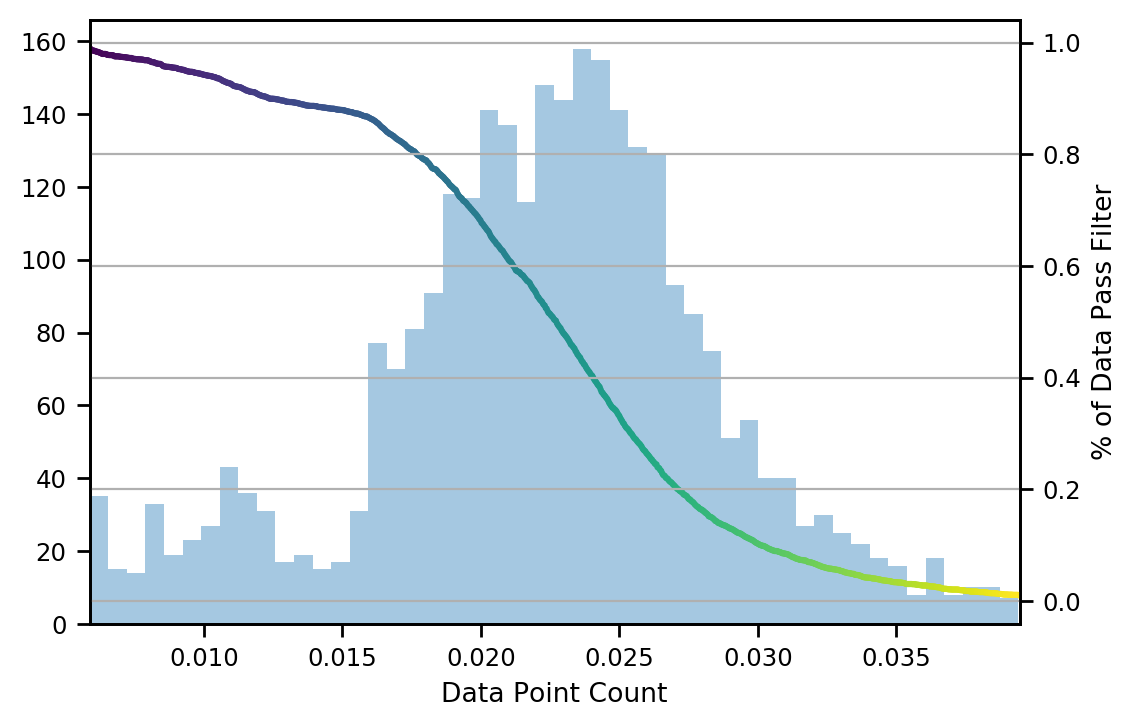

In [6]:
fig, axes = cutoff_vs_cell_remain(data=total_meta['CH_Rate'], 
                                  cutoff_num=1000, bins=50, kde=False, xlim_quantile=(0.01, 0.99))

### mCG%

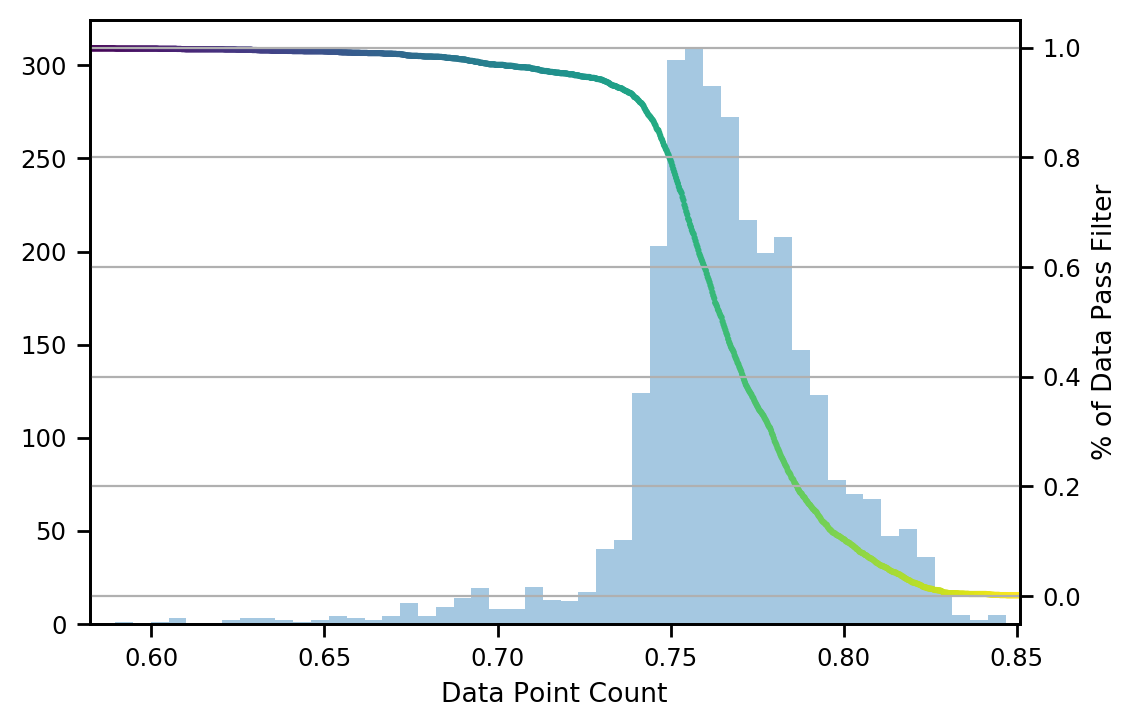

In [7]:
fig, axes = cutoff_vs_cell_remain(data=total_meta['CG_Rate'], 
                                  cutoff_num=1000, bins=50, kde=False)

### Dedupped Reads

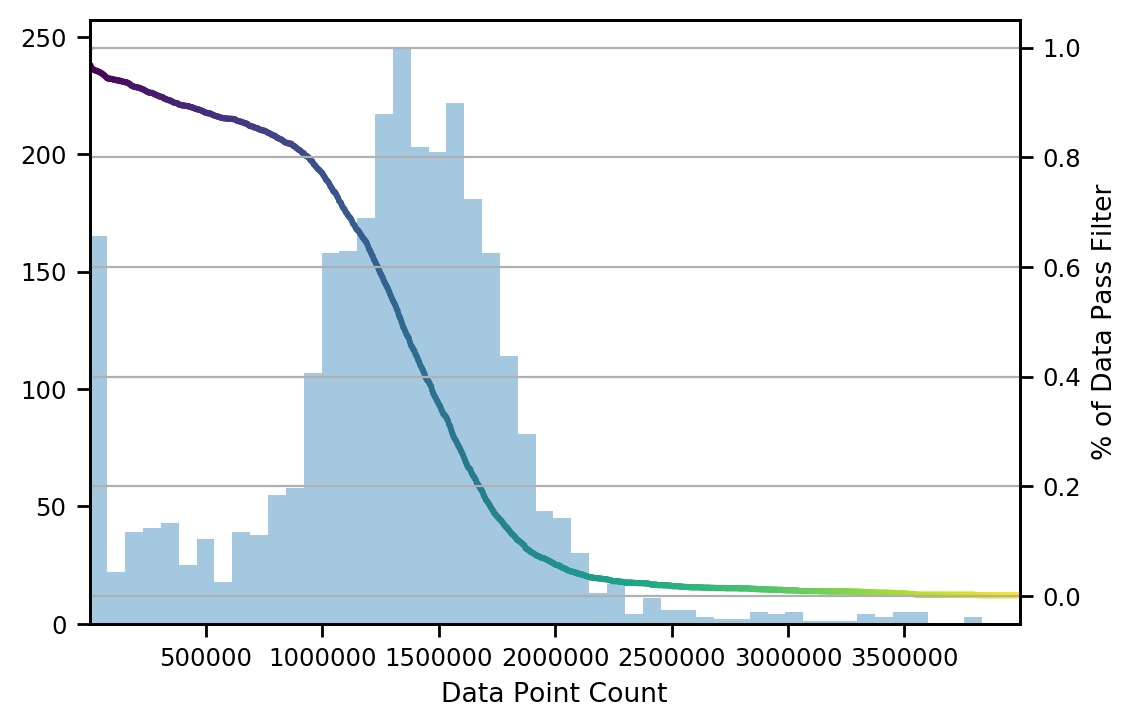

In [8]:
fig, axes = cutoff_vs_cell_remain(data=total_meta['DeduppedReads'], 
                                  cutoff_num=1000, bins=50, kde=False)

In [9]:
cell_pass = (total_meta['DeduppedReads'] > 500000).sum()
total_input = total_meta['MultiplexReadsTotal'].reset_index()[['uid', 'MultiplexReadsTotal']].drop_duplicates()['MultiplexReadsTotal'].sum()
total_final = total_meta['DeduppedReads'].sum()
print(f'In {cemba_region_name}, {cell_pass} cells have > 500,000 final reads.')
print(f'In {cemba_region_name}, {total_input} total input reads.')
print(f'In {cemba_region_name}, {int(total_final)} total final reads.')

In 9C, 2672 cells have > 500,000 final reads.
In 9C, 9646396456 total input reads.
In 9C, 3880445998 total final reads.


## Success vs Fail

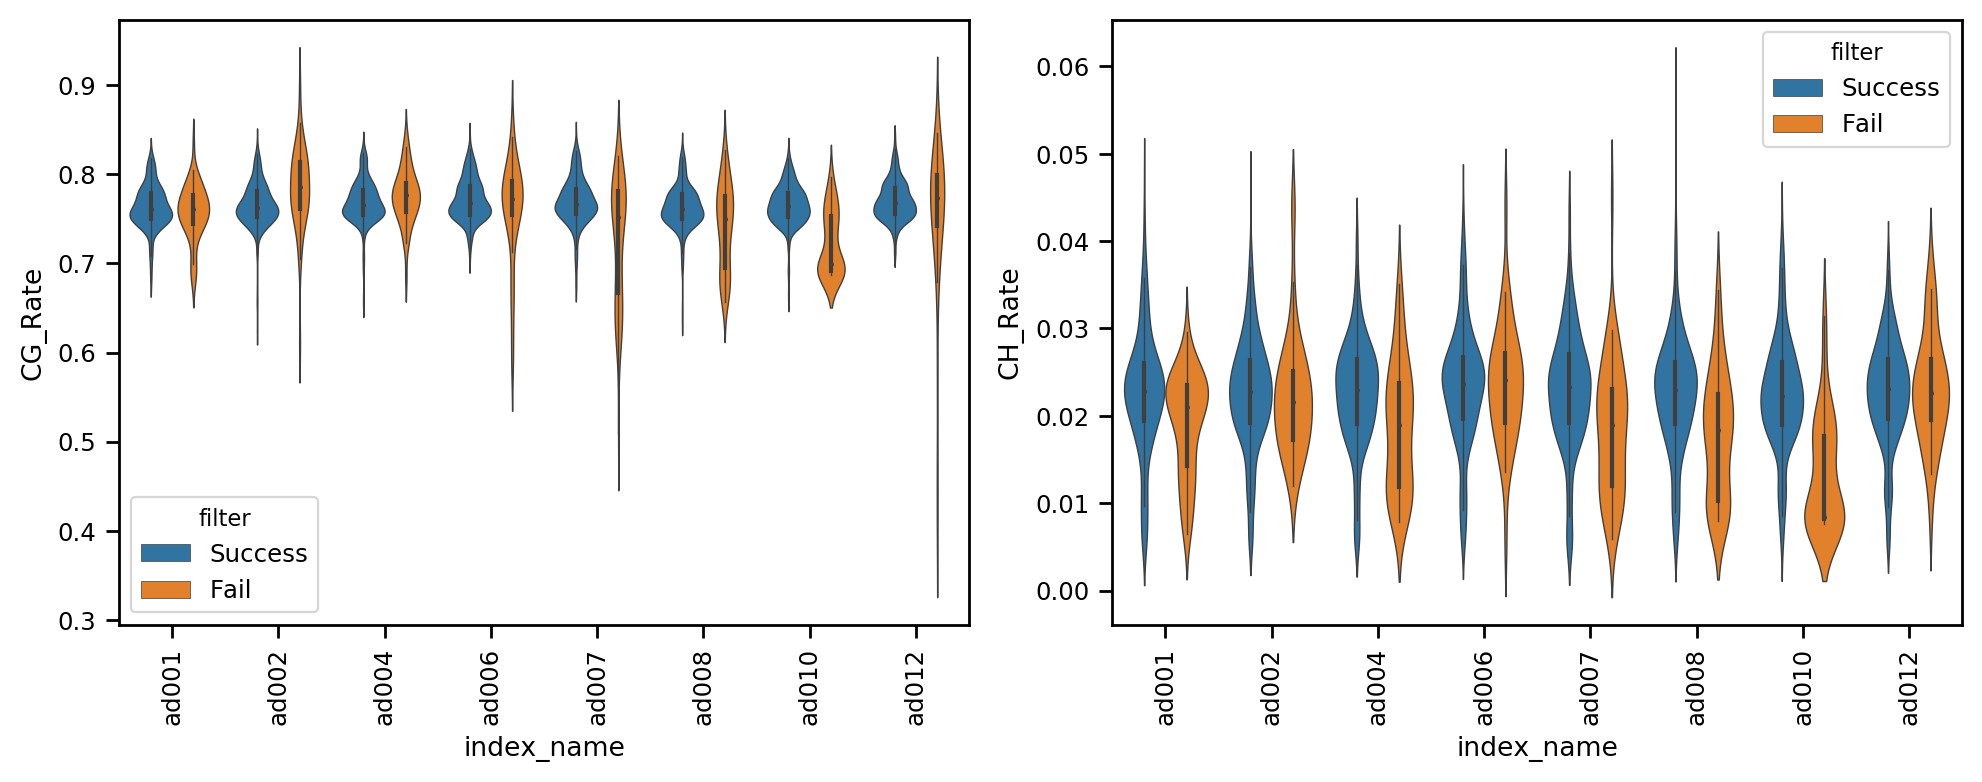

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
ax = success_vs_fail(total_meta.reset_index(), 'DeduppedReads', 500000, 'index_name', 'CG_Rate', ax=axes[0])
ax = success_vs_fail(total_meta.reset_index(), 'DeduppedReads', 500000, 'index_name', 'CH_Rate', ax=axes[1])
fig.tight_layout()

## mC%

### mCG%

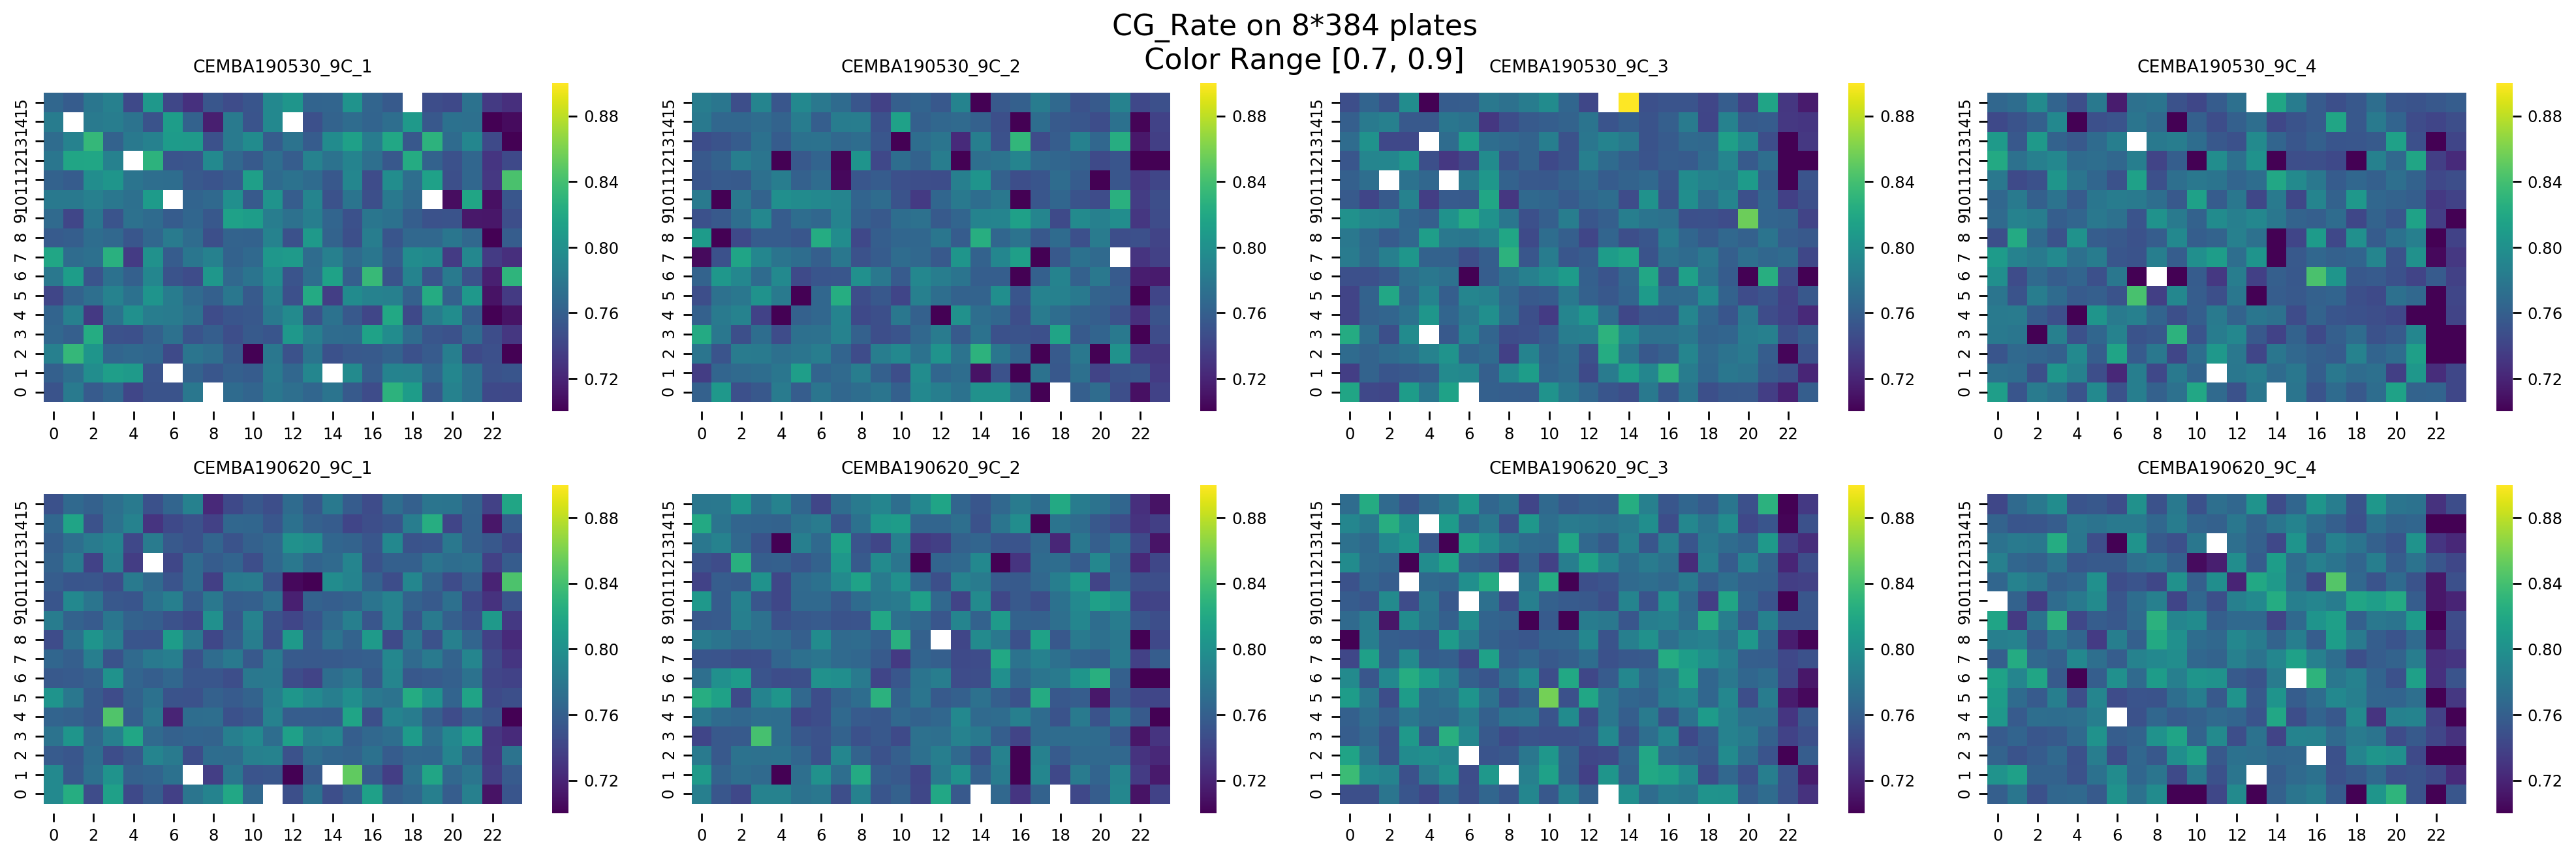

In [11]:
fig, axes = plot_on_plate(total_meta, 'CG_Rate', 'real_plate', vmin=0.7, vmax=0.9, 
                          heatmap_kws={'linewidth': 0, 'linecolor': '#EEEEEE'}, 
                          aggregation_func=lambda i: i.mean())

### mCH %

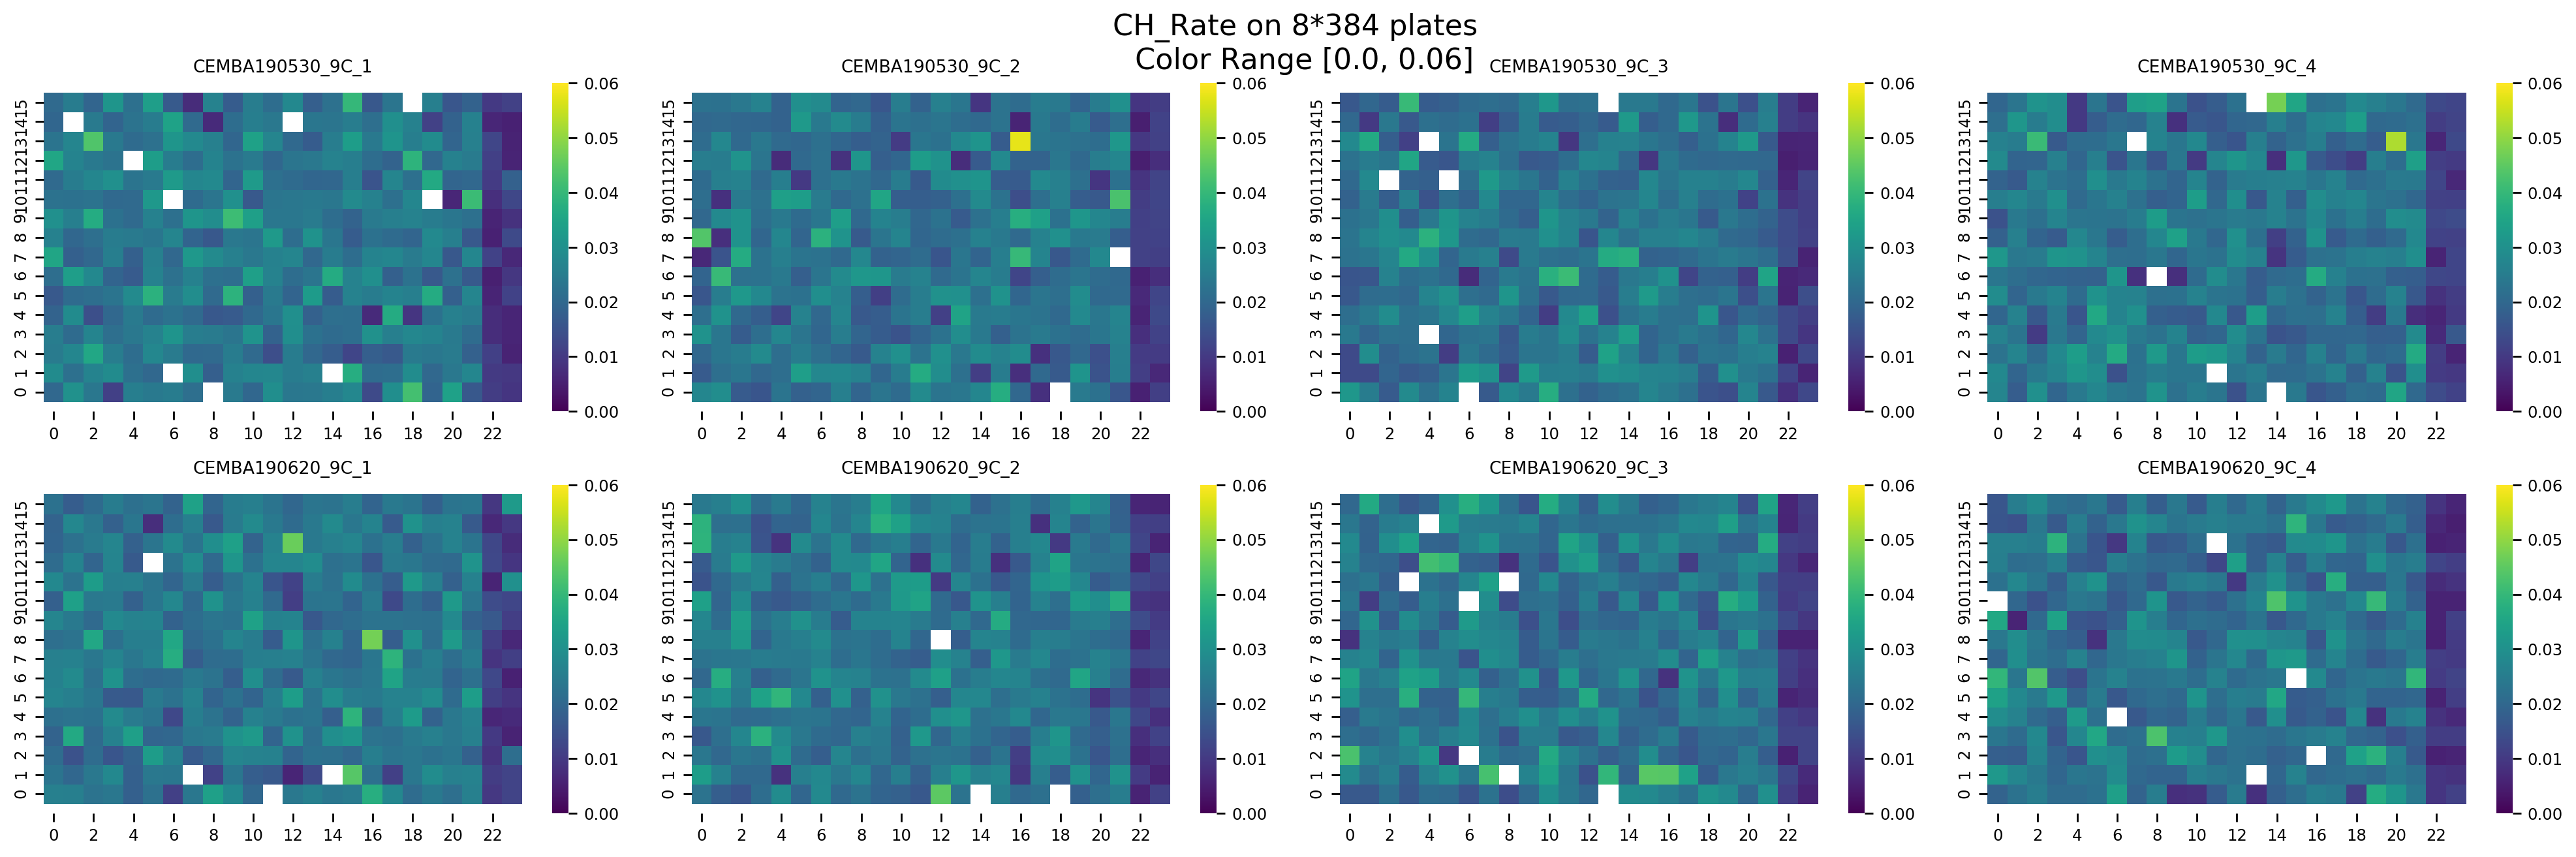

In [12]:
fig, axes = plot_on_plate(total_meta, 'CH_Rate', 'real_plate', vmin=0., vmax=0.06, 
                          heatmap_kws={'linewidth': 0, 'linecolor': '#EEEEEE'}, 
                          aggregation_func=lambda i: i.mean())

## Reads at FASTQ level
### MultiplexReadsTotal
- Total Fastq Reads before demultiplex

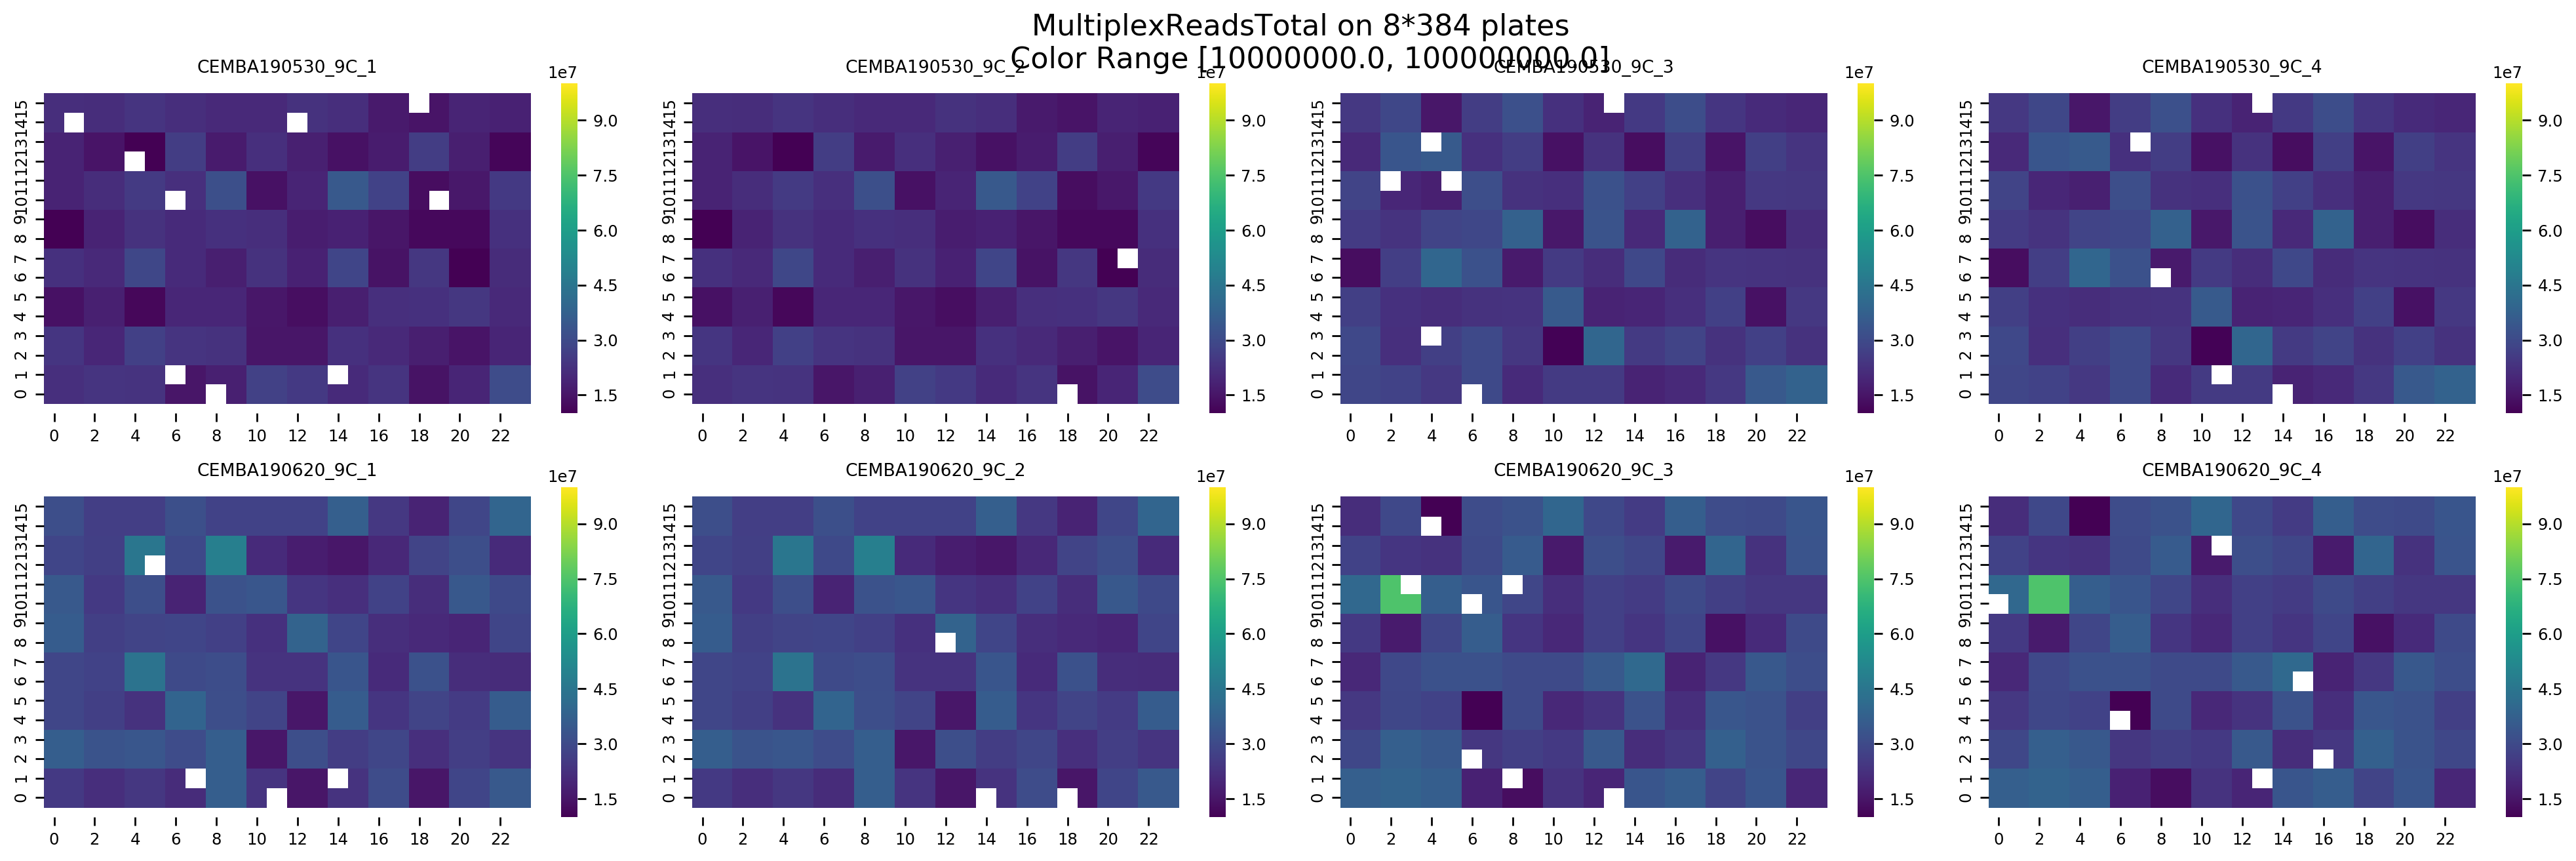

In [13]:
fig, axes = plot_on_plate(total_meta, 'MultiplexReadsTotal', 'real_plate', vmin=1e7, vmax=1e8, 
                          heatmap_kws={'linewidth': 0, 'linecolor': '#EEEEEE'},
                          aggregation_func=lambda i: i.mean())

### IndexReadsRatio
- Portion of each index_name (cell) among every 8-multiplexed fastq group

(<Figure size 1000x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f340806ea90>)

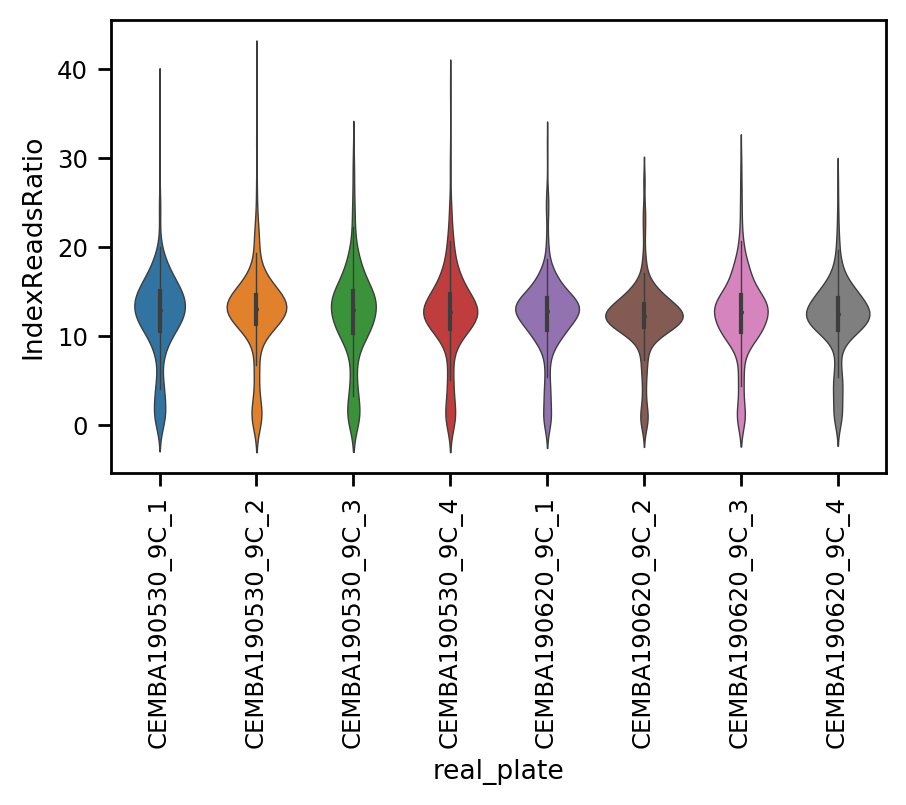

In [14]:
simple_violin(x='real_plate', y='IndexReadsRatio', data=total_meta)

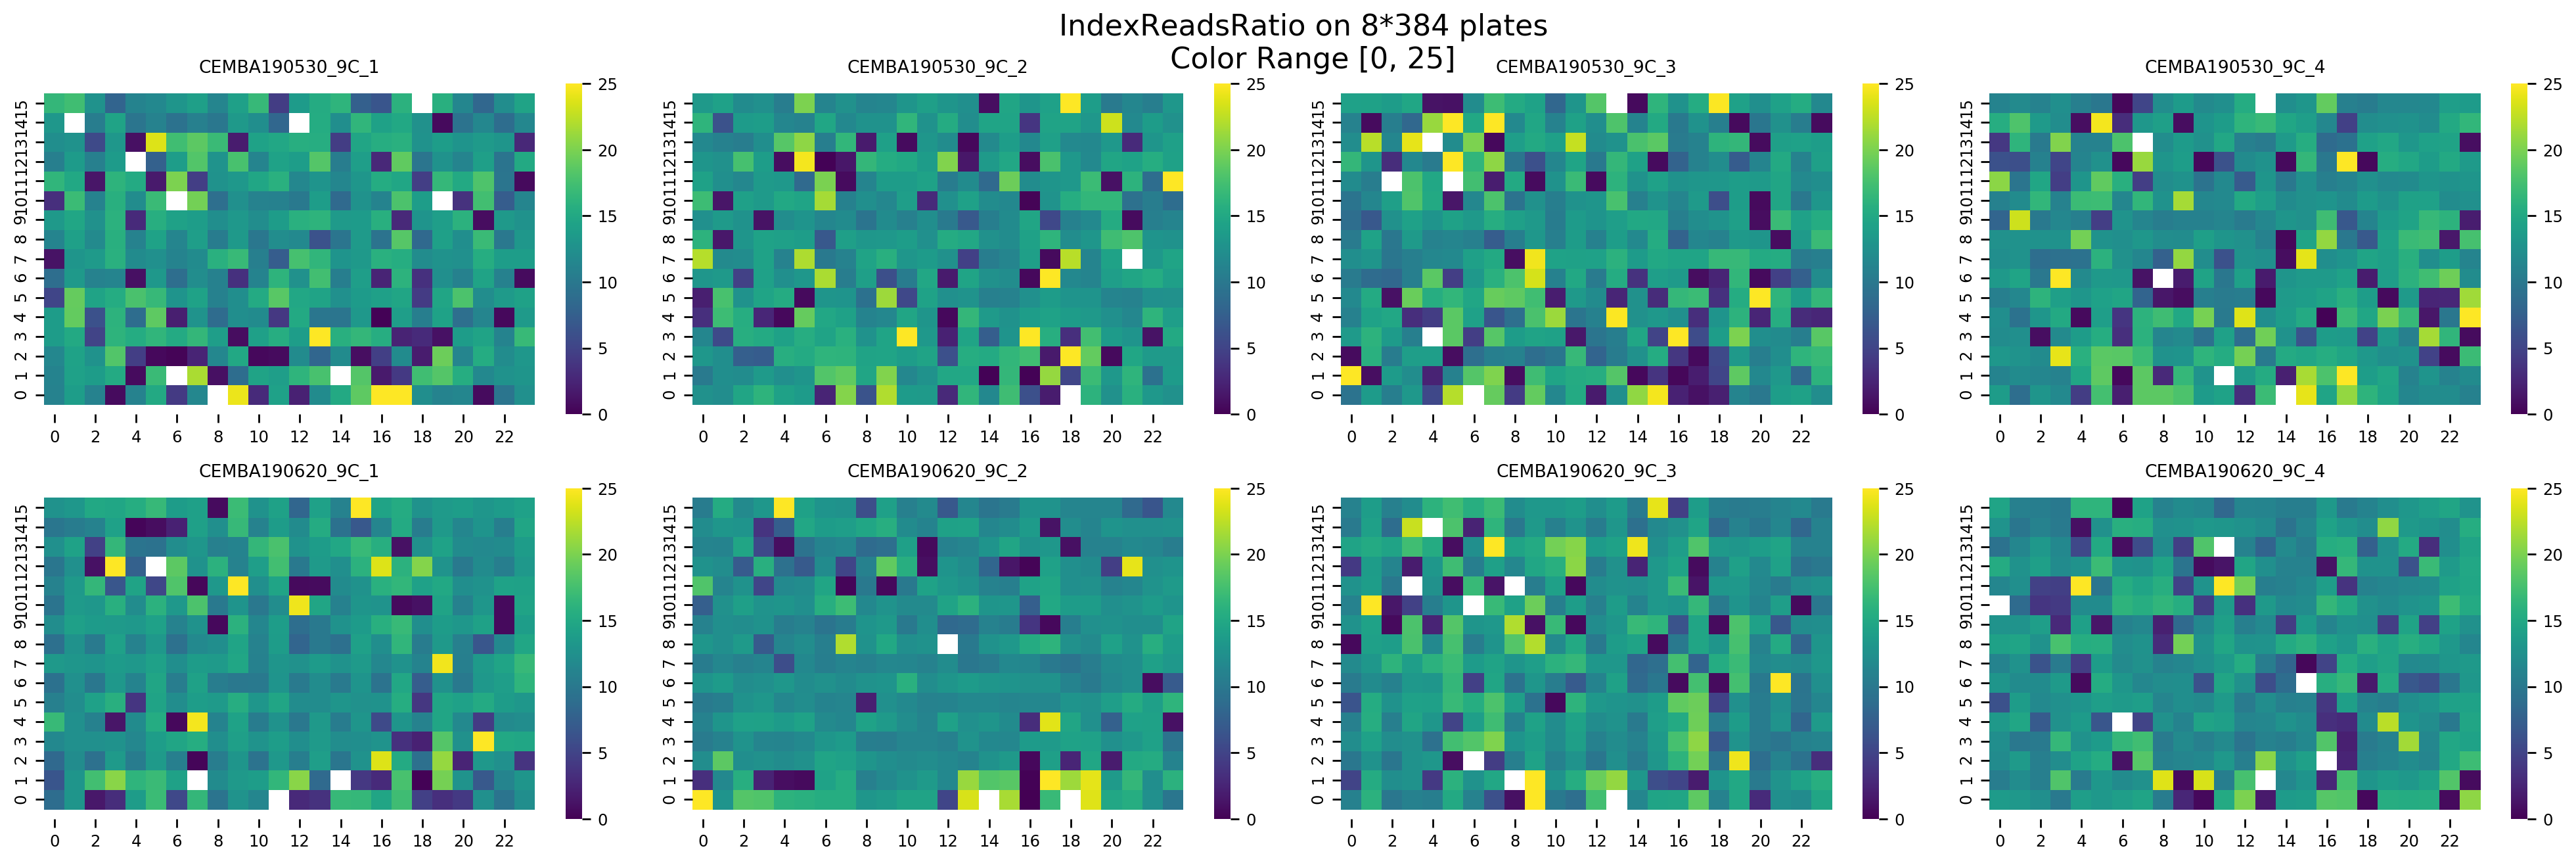

In [15]:
fig, axes = plot_on_plate(total_meta, 'IndexReadsRatio', 'real_plate', vmin=0, vmax=25, 
                          heatmap_kws={'linewidth': 0, 'linecolor': '#EEEEEE'}, 
                          aggregation_func=lambda i: i.mean())

### IndexReads
#### Total

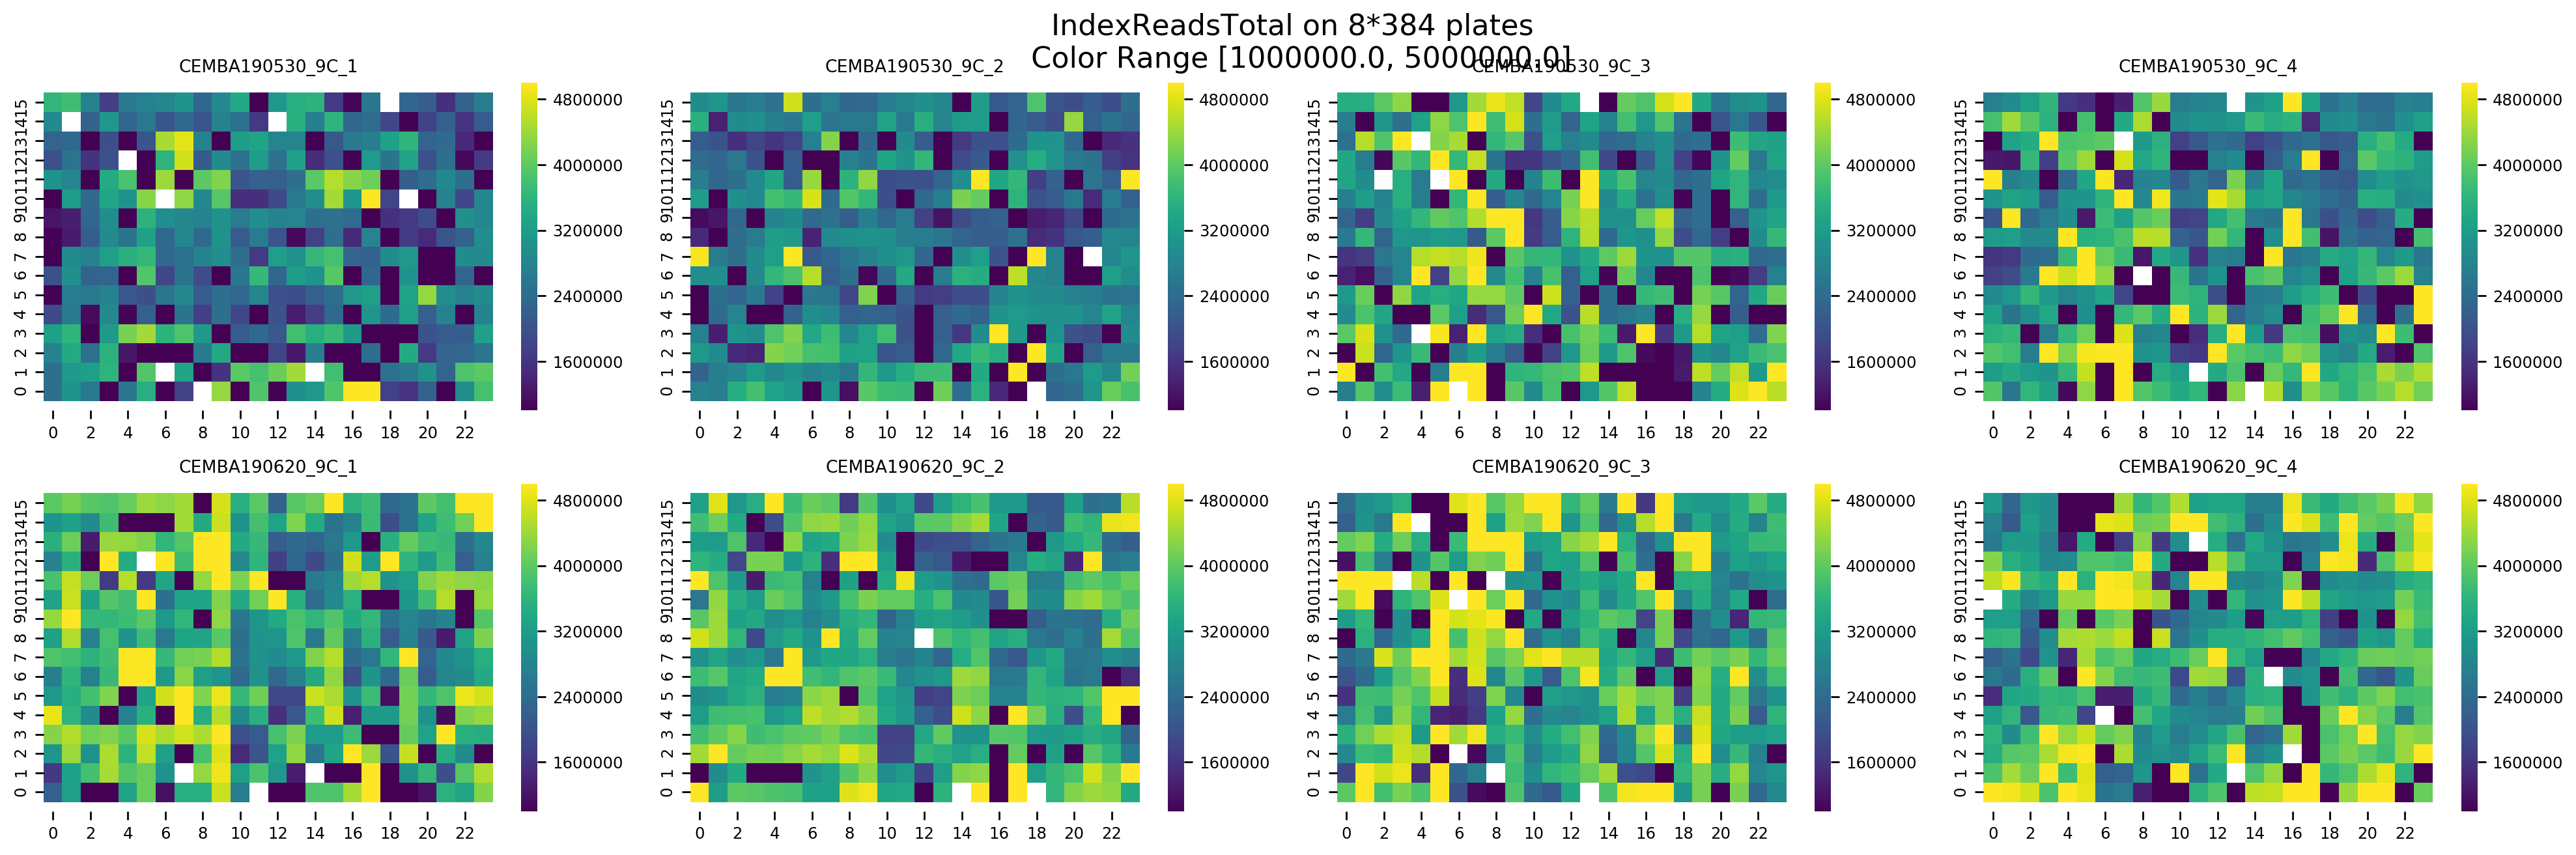

In [16]:
fig, axes = plot_on_plate(total_meta, 'IndexReadsTotal', 'real_plate', vmin=1e6, vmax=5e6, 
                          heatmap_kws={'linewidth': 0, 'linecolor': '#EEEEEE'}, 
                          aggregation_func=lambda i: i.mean())

#### Ratio

(0.7, 1)

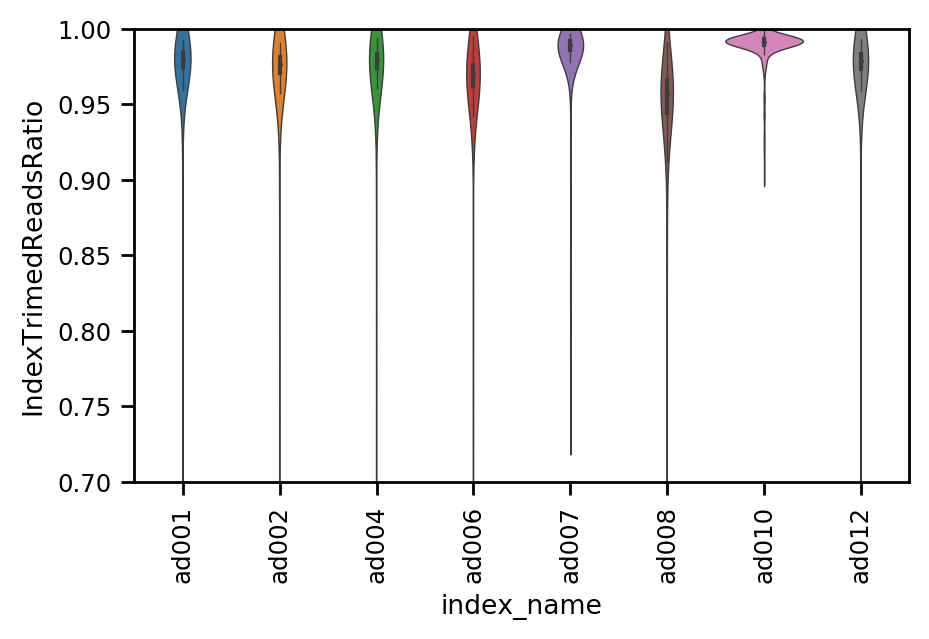

In [17]:
fig, ax = simple_violin(x='index_name', y='IndexTrimedReadsRatio', 
                        data=total_meta.reset_index())
ax.set_ylim(0.7, 1)

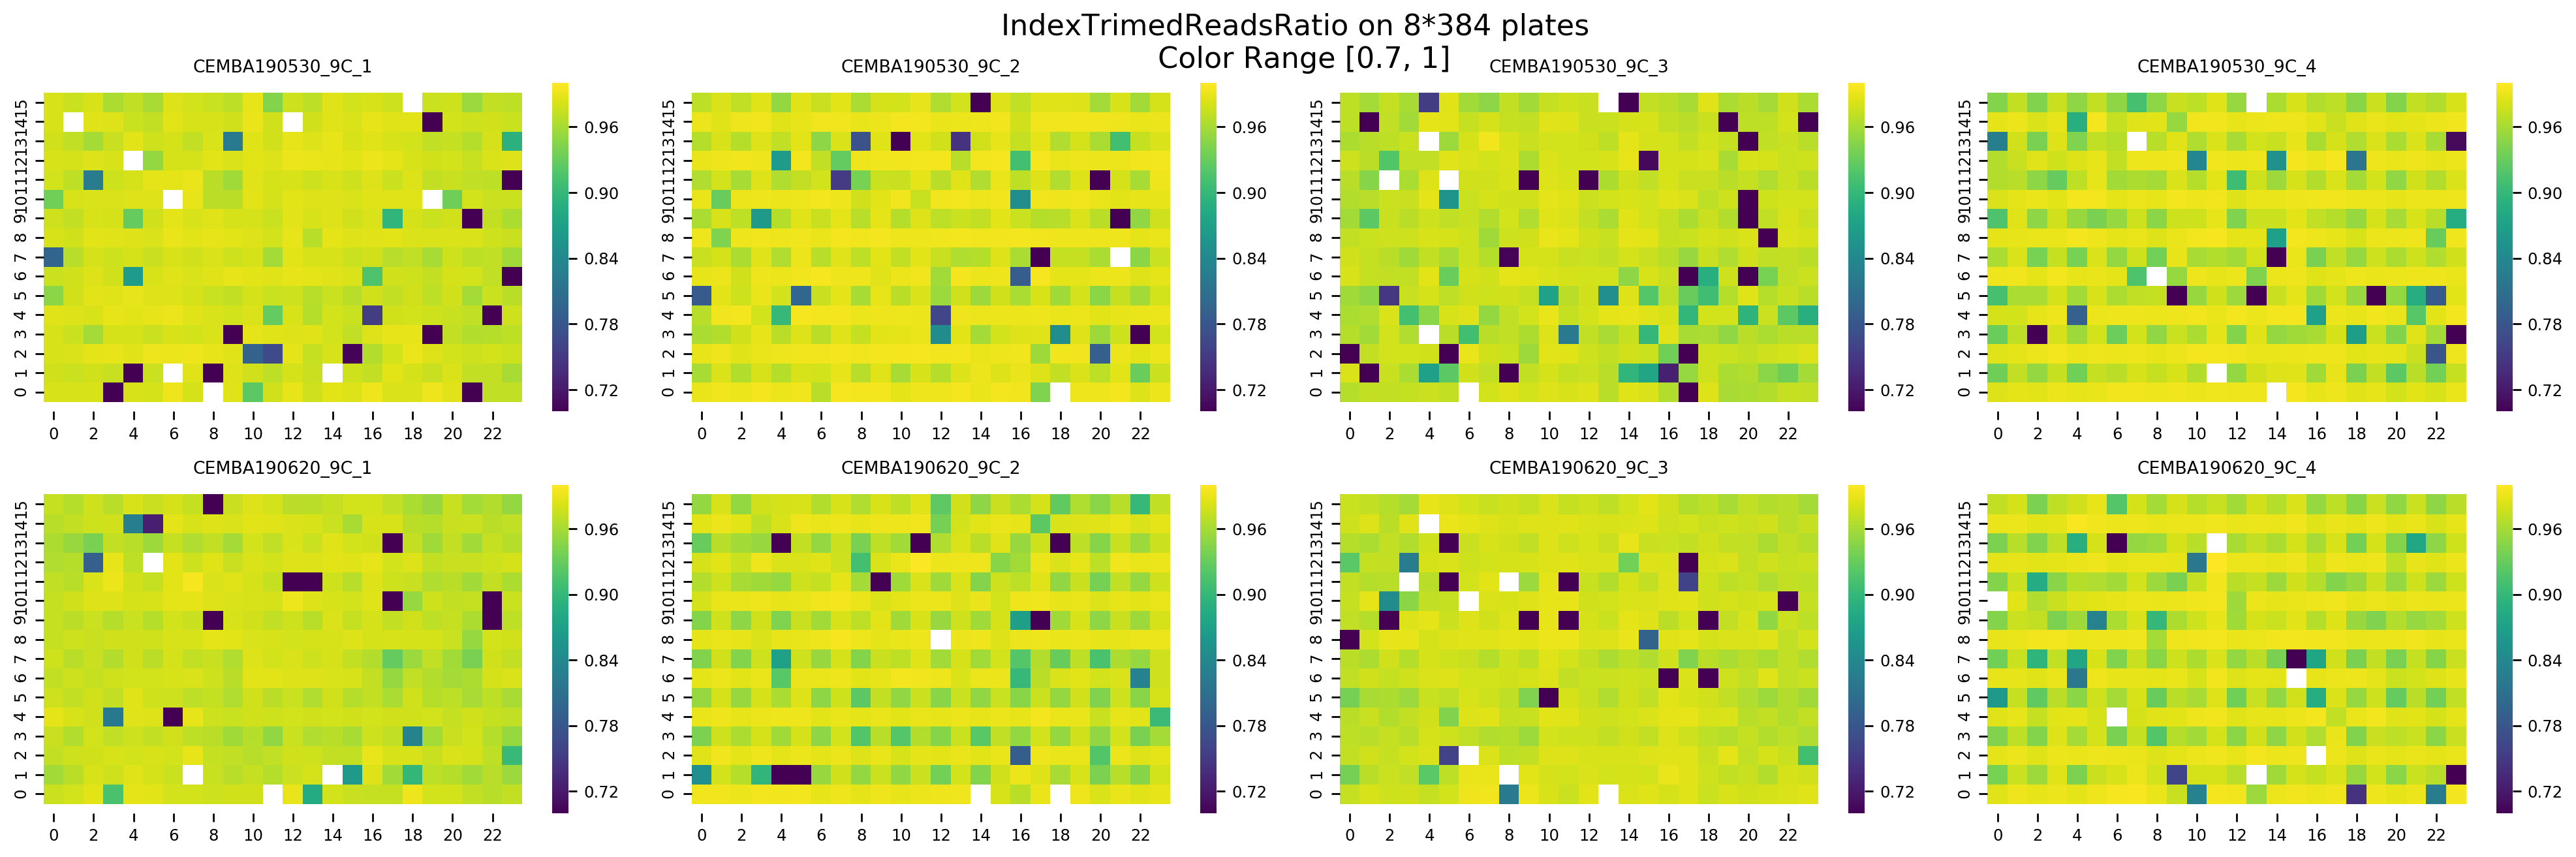

In [18]:
fig, axes = plot_on_plate(total_meta, 'IndexTrimedReadsRatio', 'real_plate', vmin=0.7, vmax=1, 
                          heatmap_kws={'linewidth': 0, 'linecolor': '#EEEEEE'}, 
                          aggregation_func=lambda i: i.mean())

##  Reads at BAM level

### Mapping Ratio

#### R1

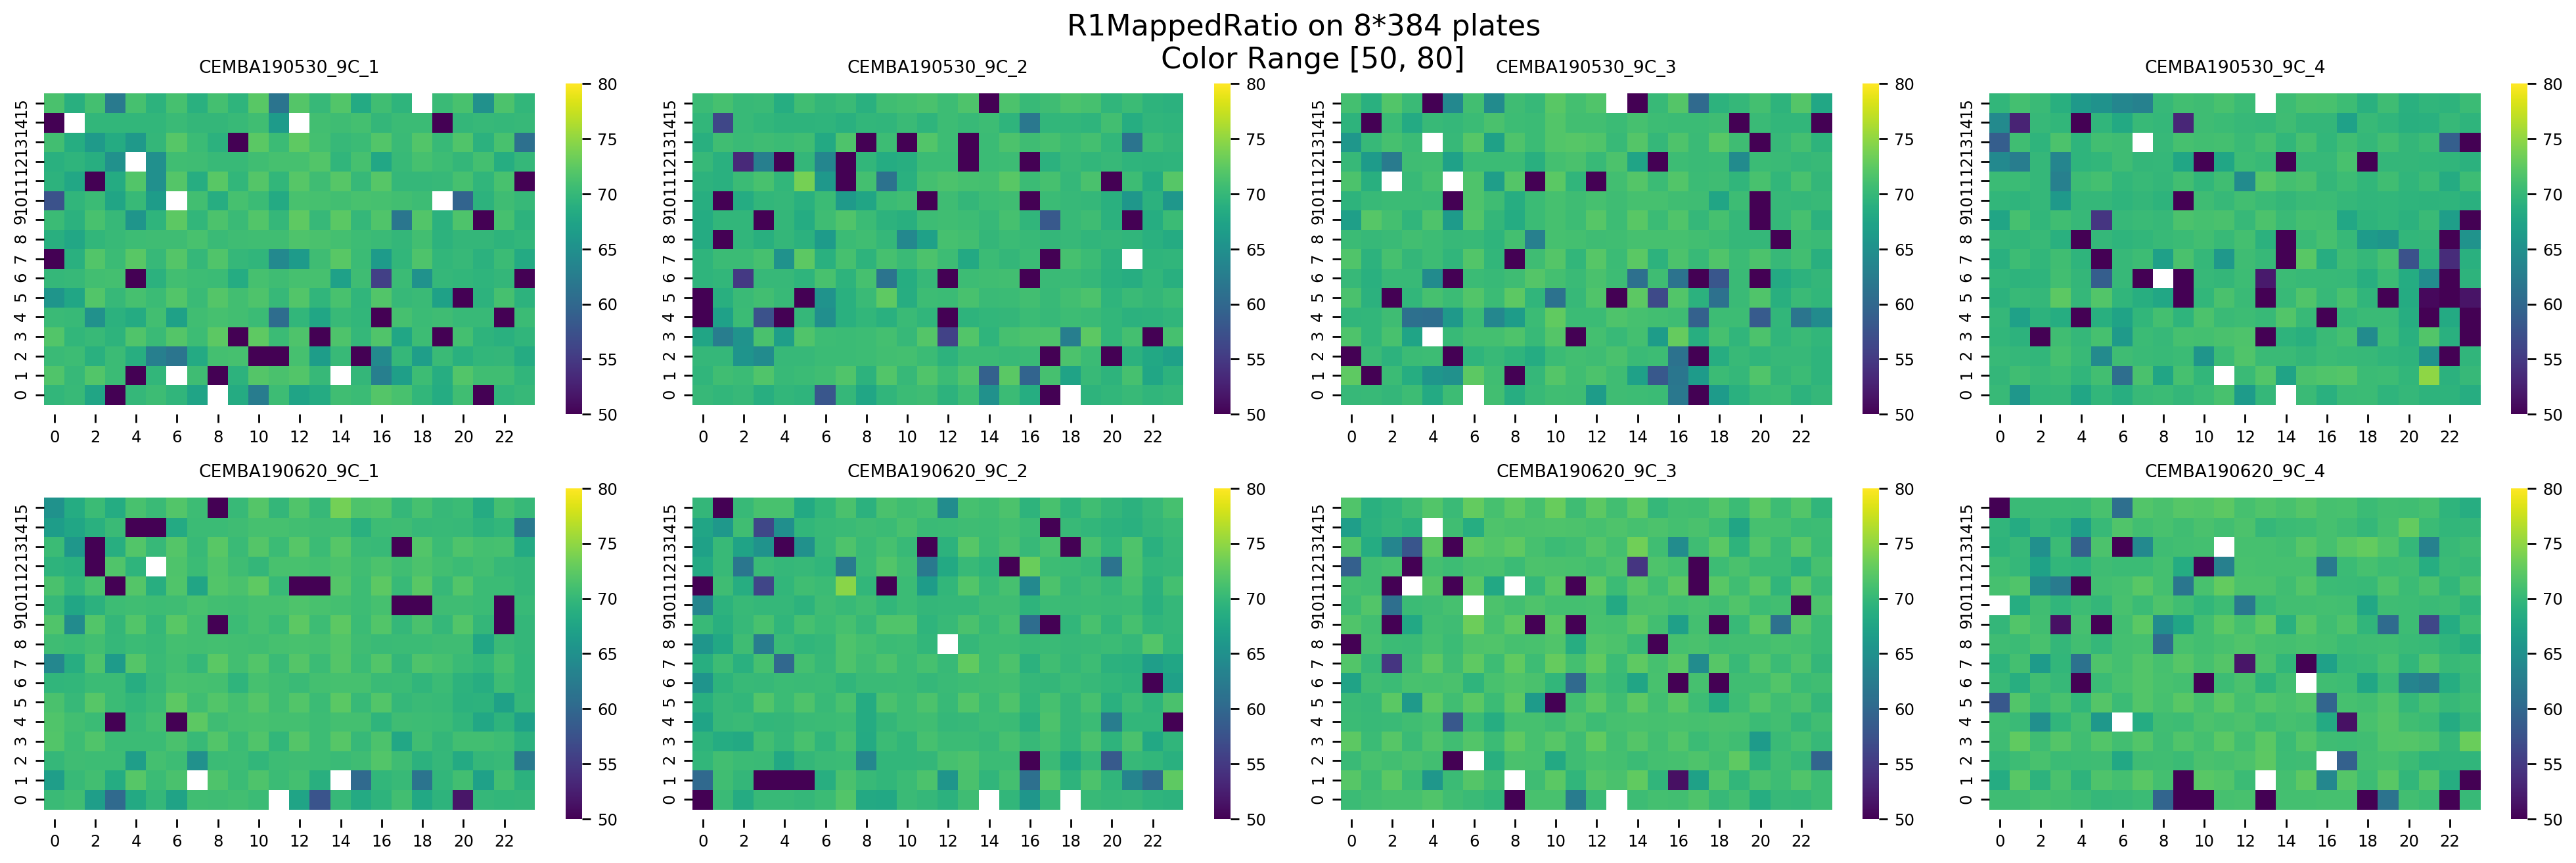

In [19]:
fig, axes = plot_on_plate(total_meta, 'R1MappedRatio', 'real_plate', vmin=50, vmax=80, 
                          heatmap_kws={'linewidth': 0, 'linecolor': '#EEEEEE'}, 
                          aggregation_func=lambda i: i.mean())

#### R2

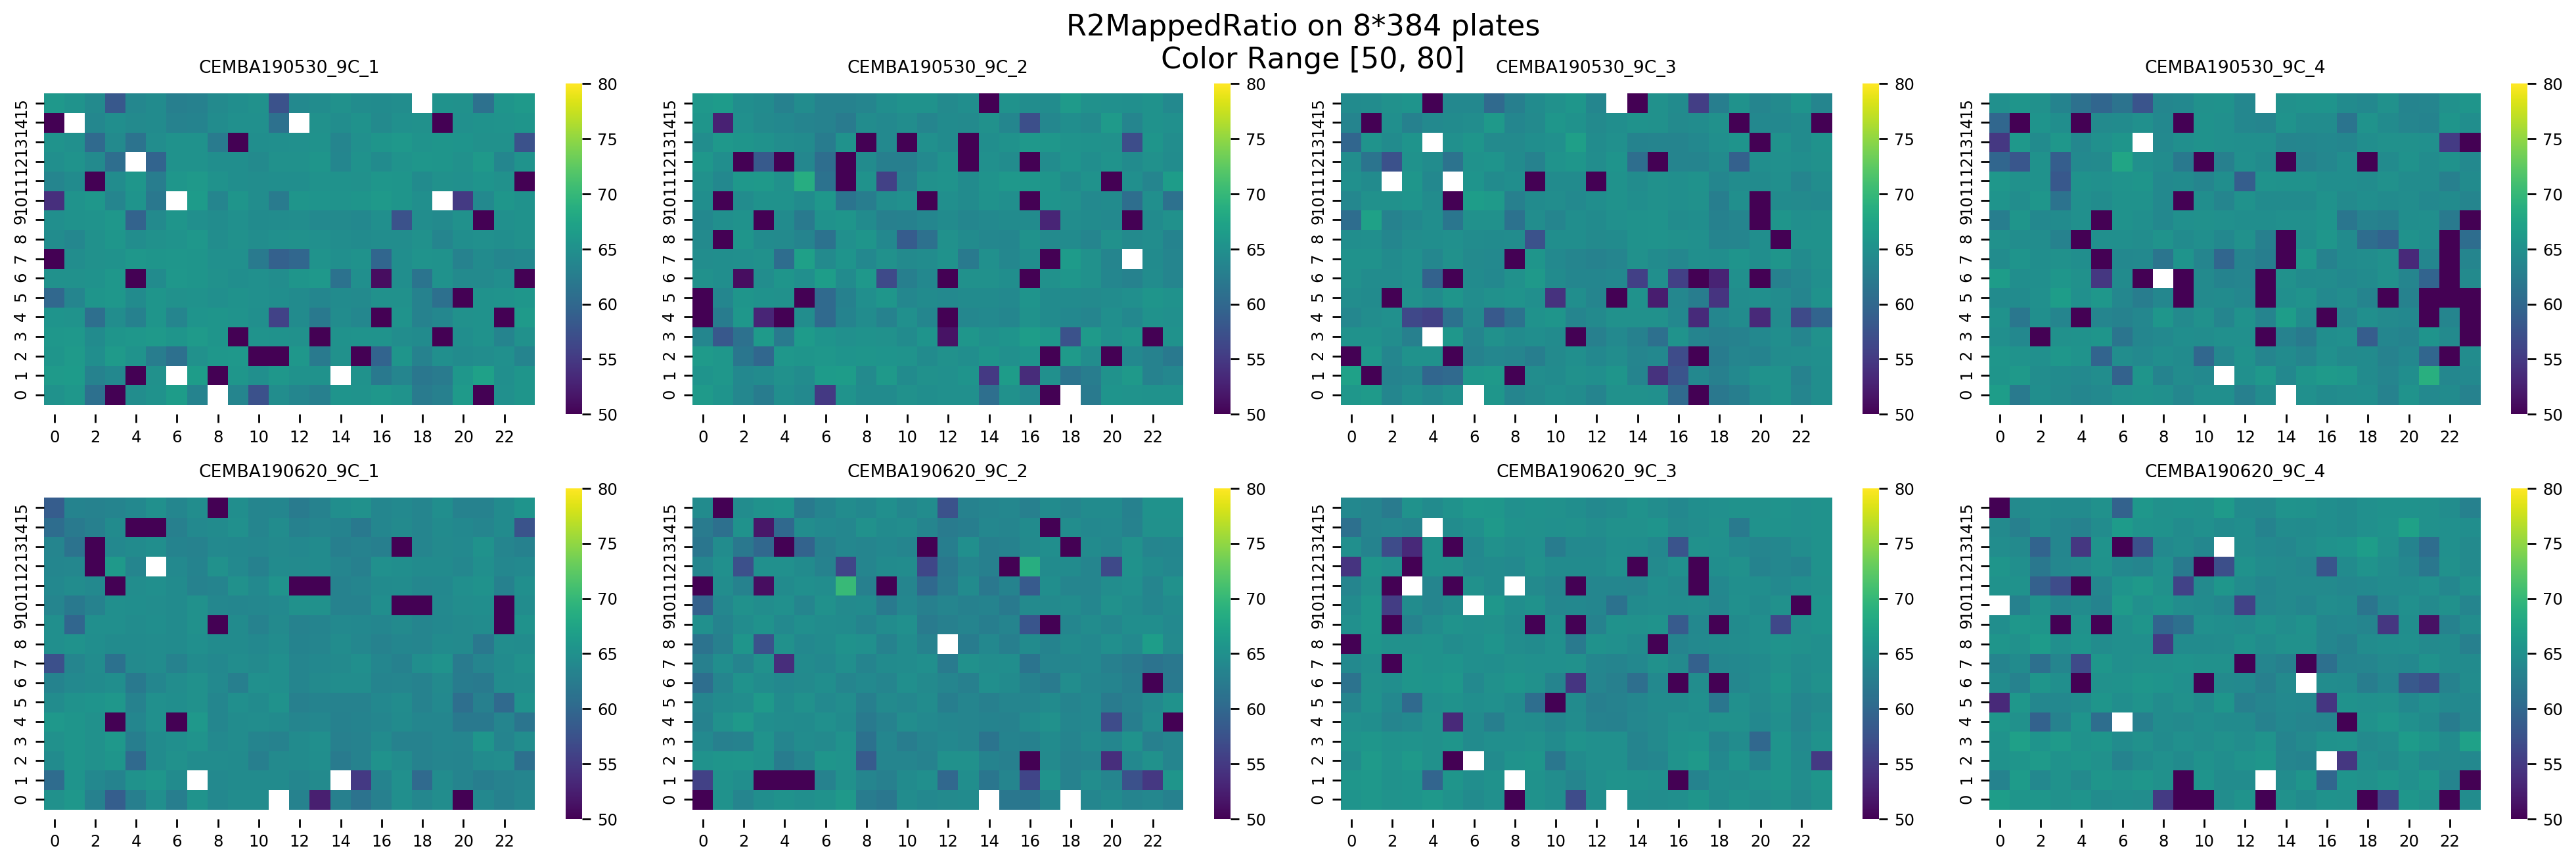

In [20]:
fig, axes = plot_on_plate(total_meta, 'R2MappedRatio', 'real_plate', vmin=50, vmax=80, 
                          heatmap_kws={'linewidth': 0, 'linecolor': '#EEEEEE'}, 
                          aggregation_func=lambda i: i.mean())

### PCR duplicates

####  Non-duplicates Ratio

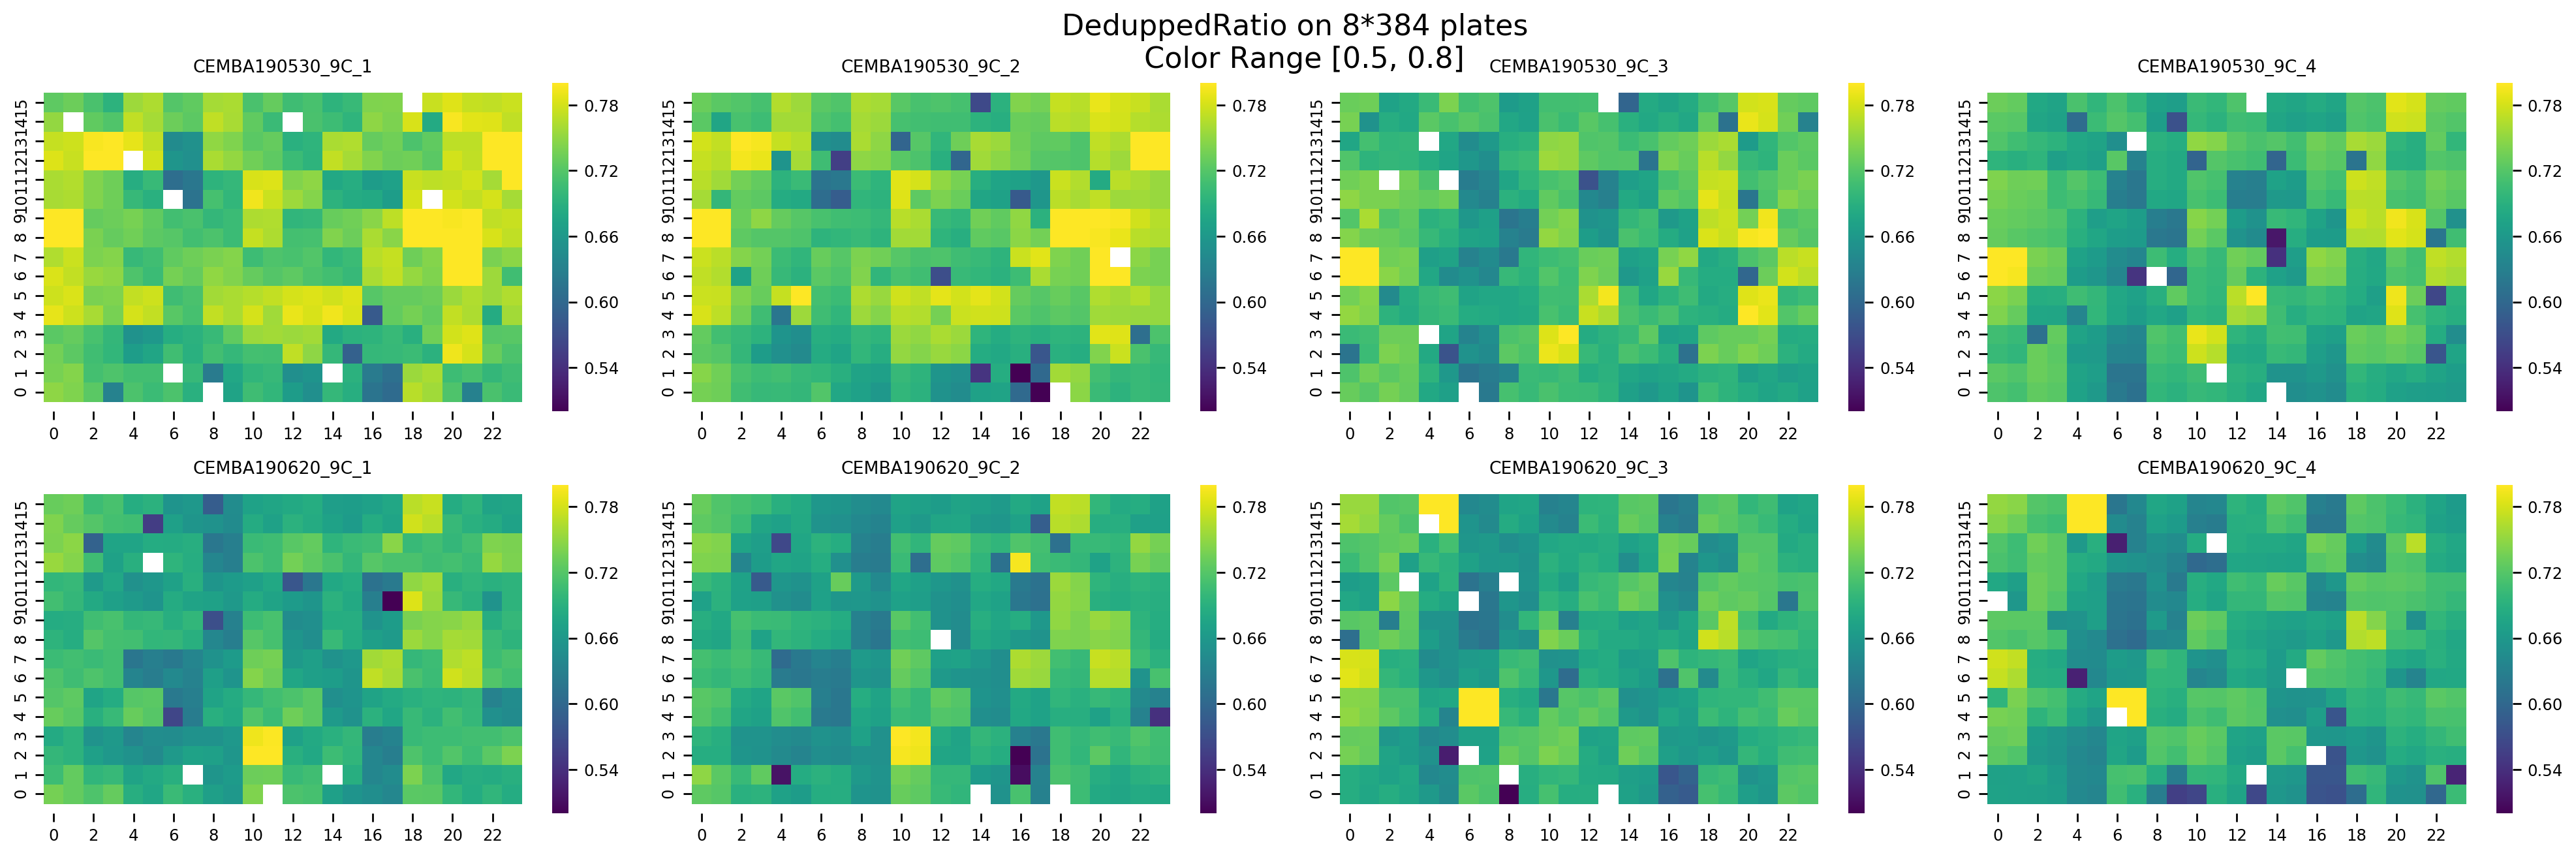

In [21]:
fig, axes = plot_on_plate(total_meta, 'DeduppedRatio', 'real_plate', vmin=0.5, vmax=0.8, 
                          heatmap_kws={'linewidth': 0, 'linecolor': '#EEEEEE'}, 
                          aggregation_func=lambda i: i.mean())

#### Total non-duplicate reads (including MAPQ filter)

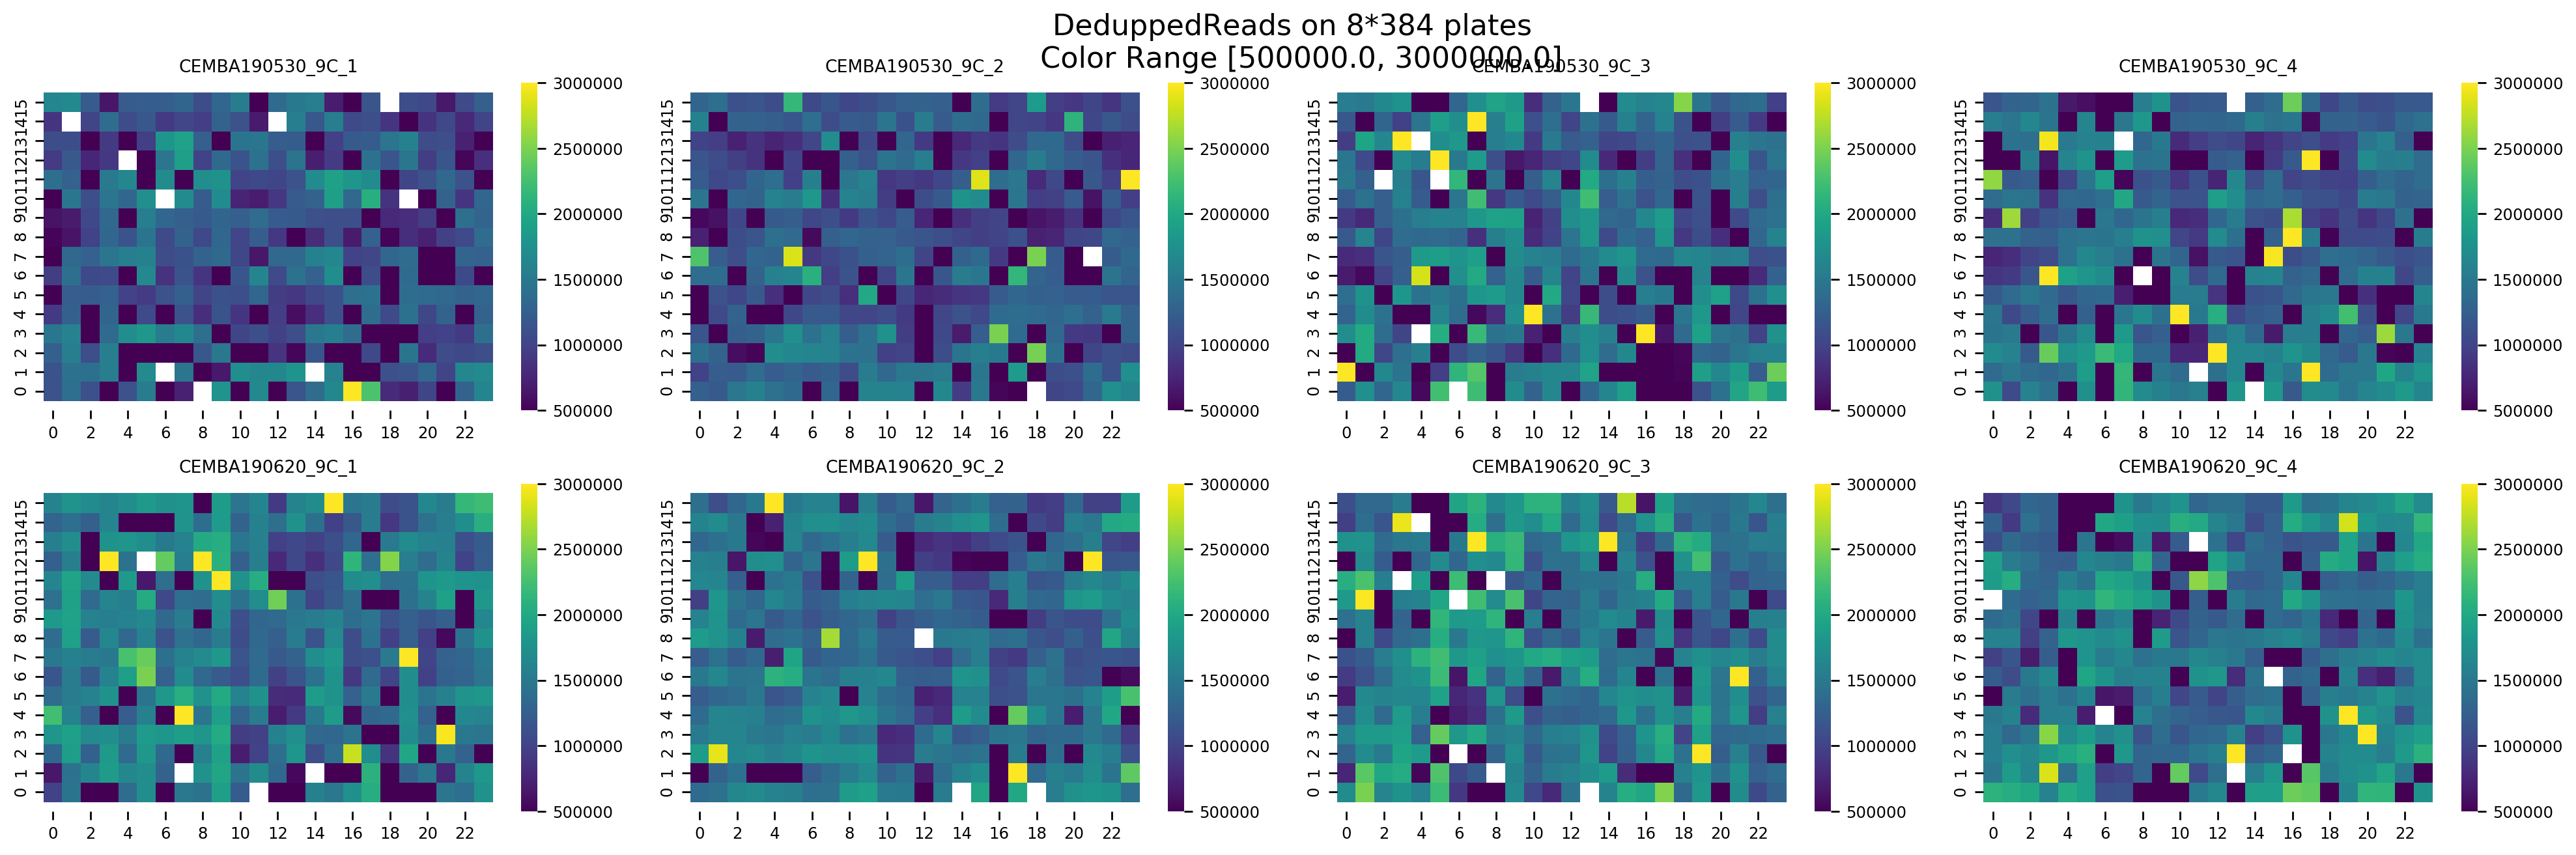

In [22]:
fig, axes = plot_on_plate(total_meta, 'DeduppedReads', 'real_plate', vmin=5e5, vmax=3e6, 
                          heatmap_kws={'linewidth': 0, 'linecolor': '#EEEEEE'}, 
                          aggregation_func=lambda i: i.mean())

## Pairplot

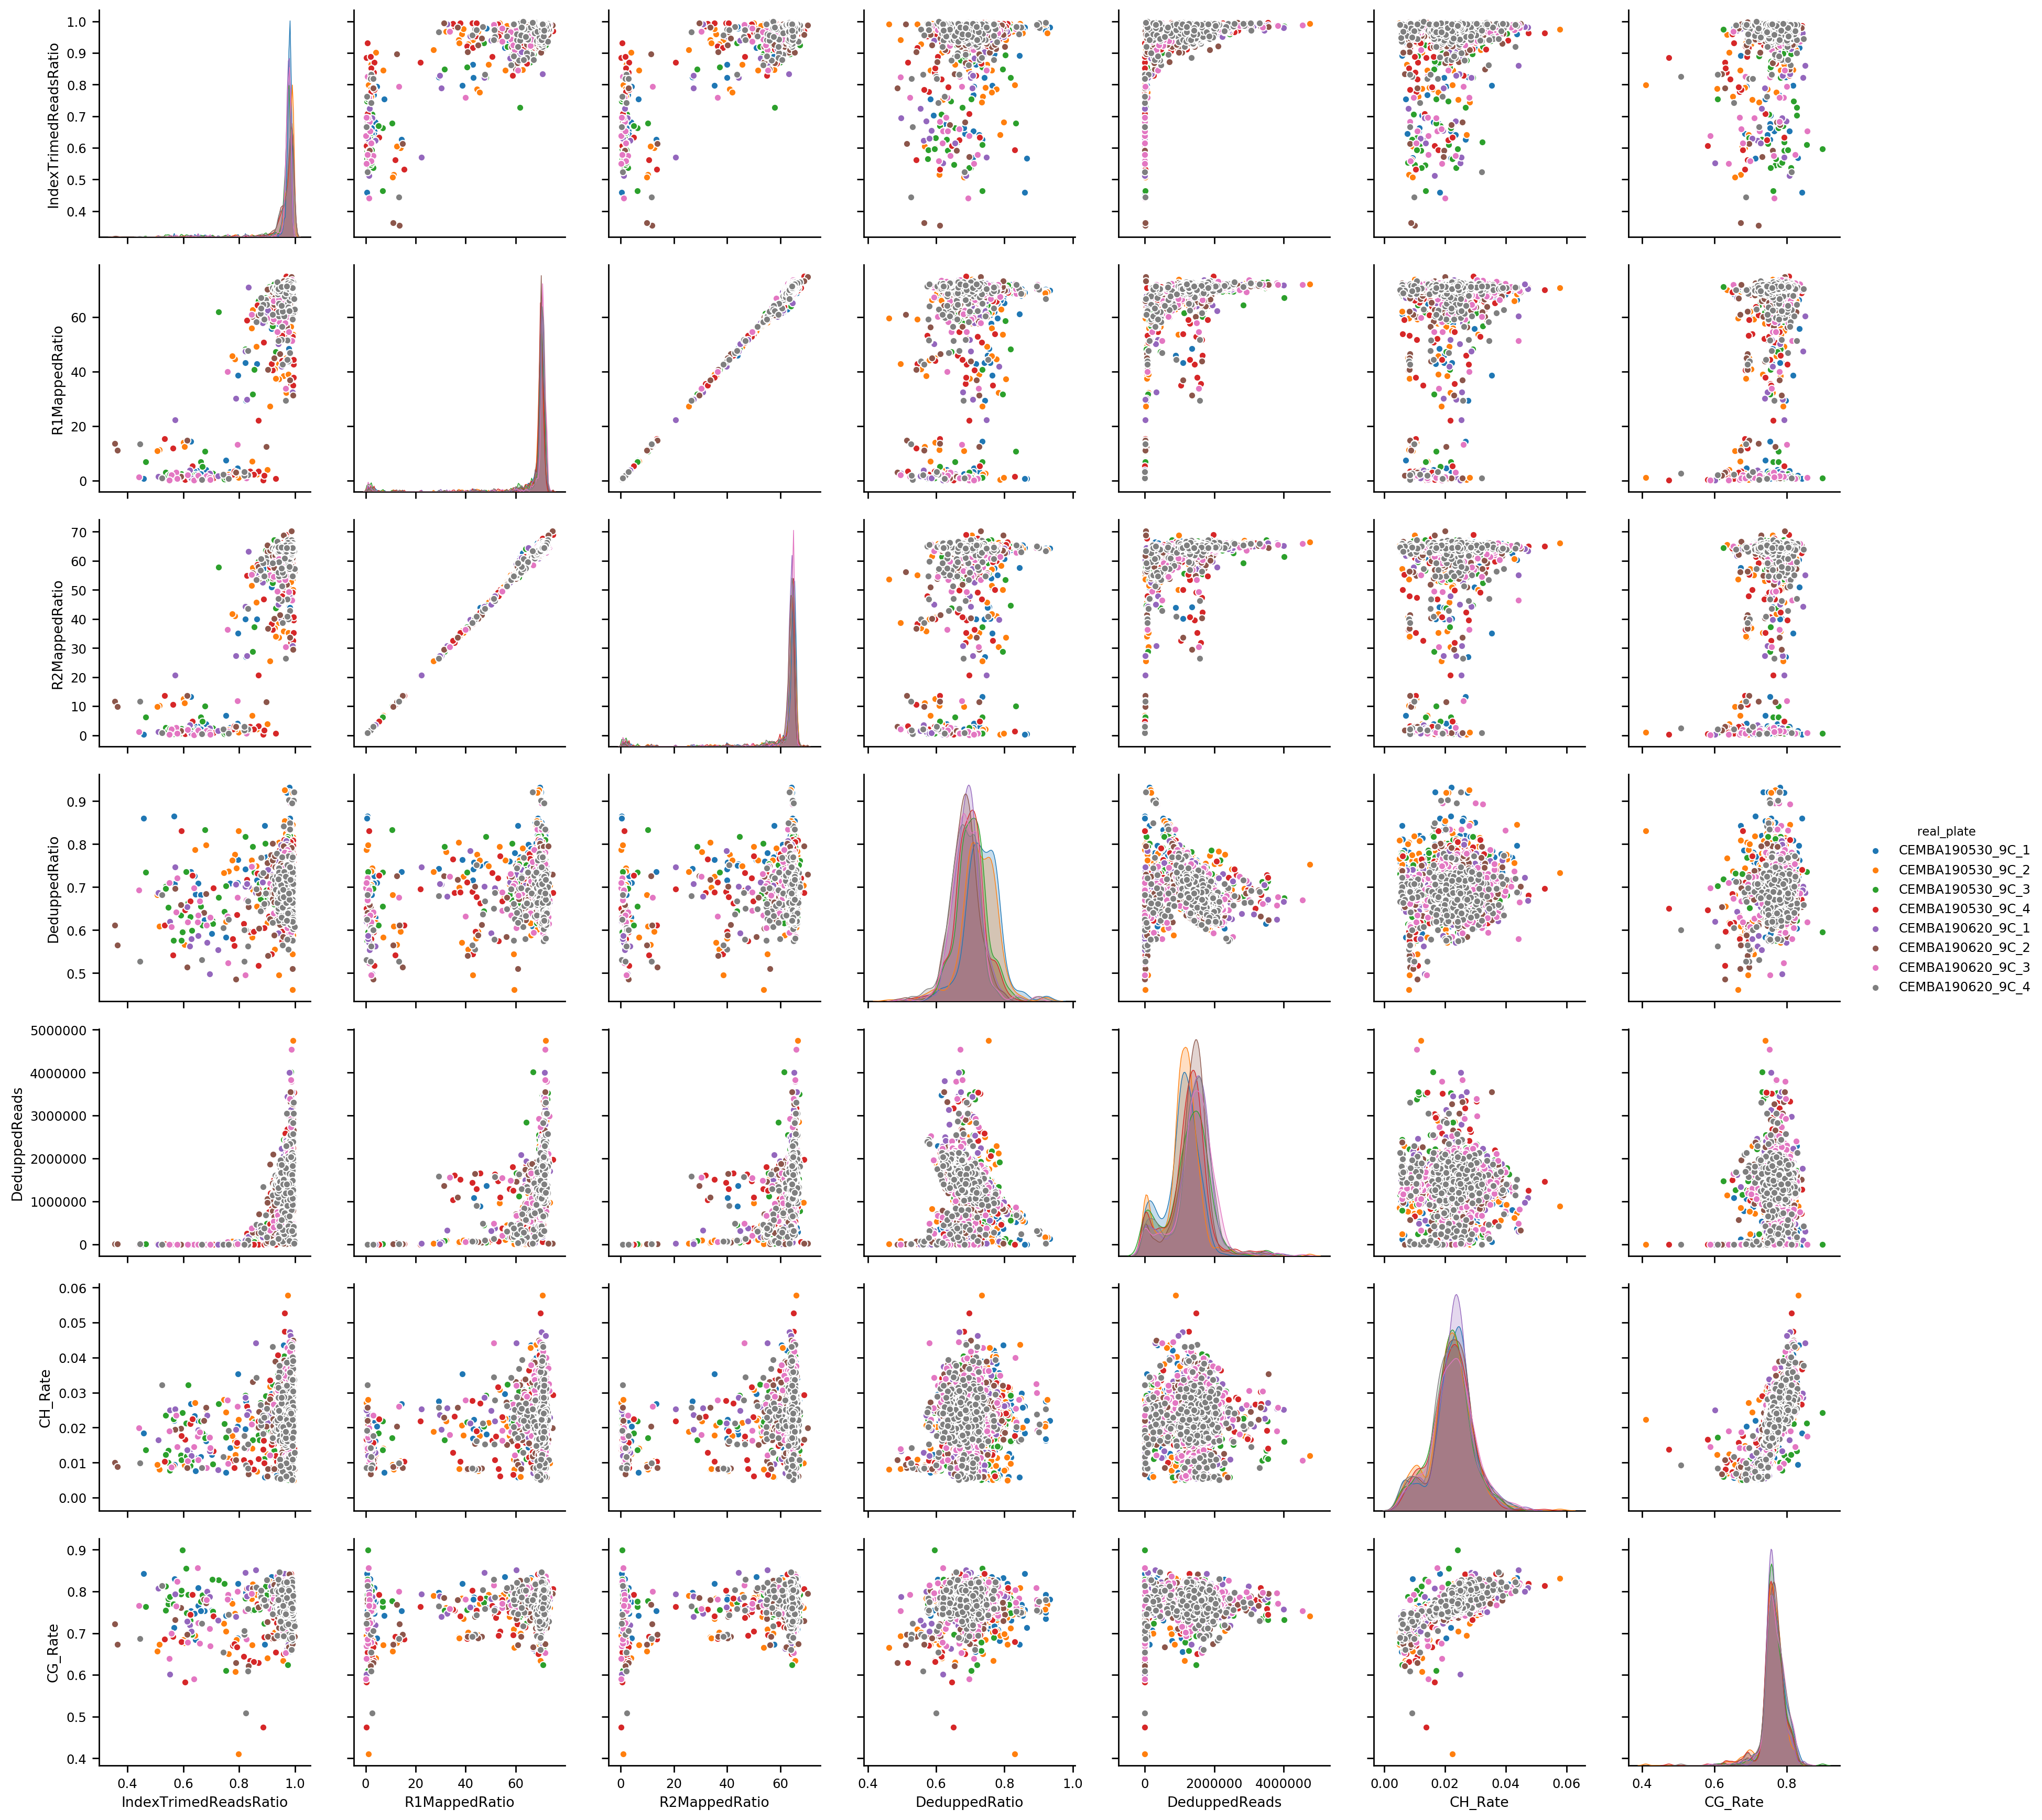

In [23]:
sns.pairplot(total_meta.reset_index()[['real_plate', 'IndexTrimedReadsRatio',
                                       'R1MappedRatio', 'R2MappedRatio',
                                       'DeduppedRatio', 'DeduppedReads', 'CH_Rate', 'CG_Rate']], 
             hue='real_plate')

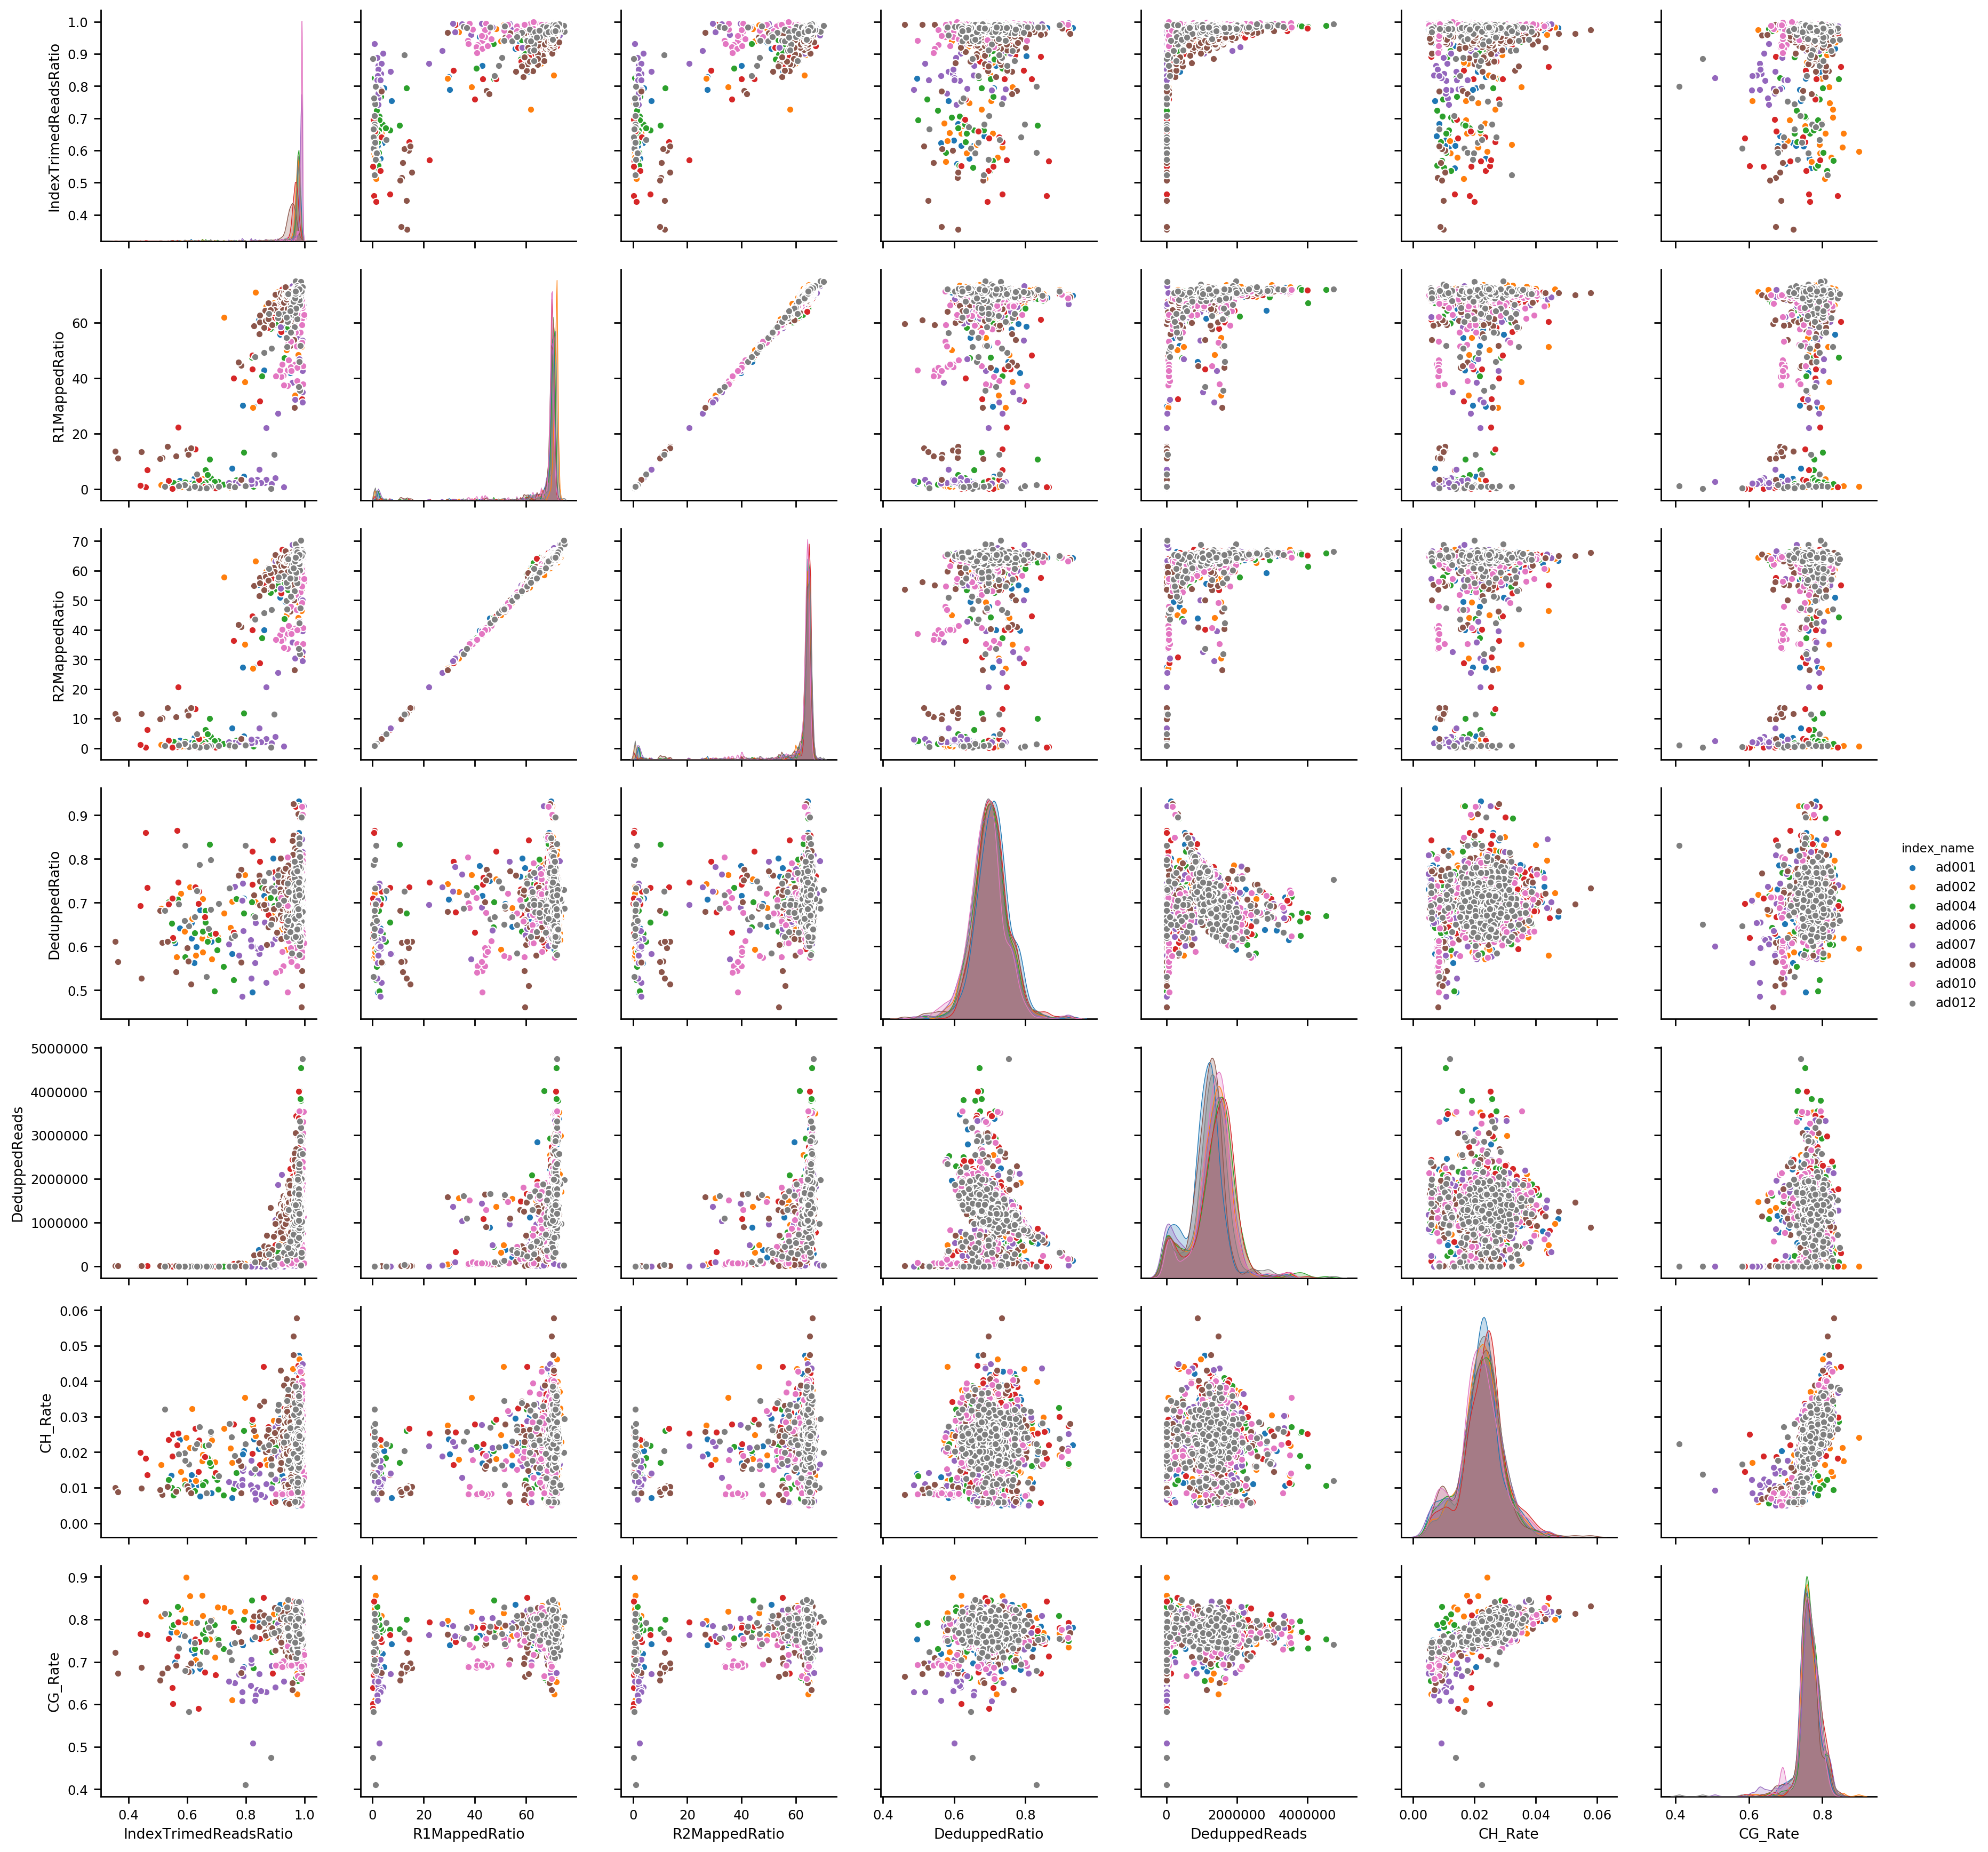

In [24]:
sns.pairplot(total_meta.reset_index()[['index_name', 'IndexTrimedReadsRatio',
                                       'R1MappedRatio', 'R2MappedRatio',
                                       'DeduppedRatio', 'DeduppedReads', 'CH_Rate', 'CG_Rate']], 
             hue='index_name')

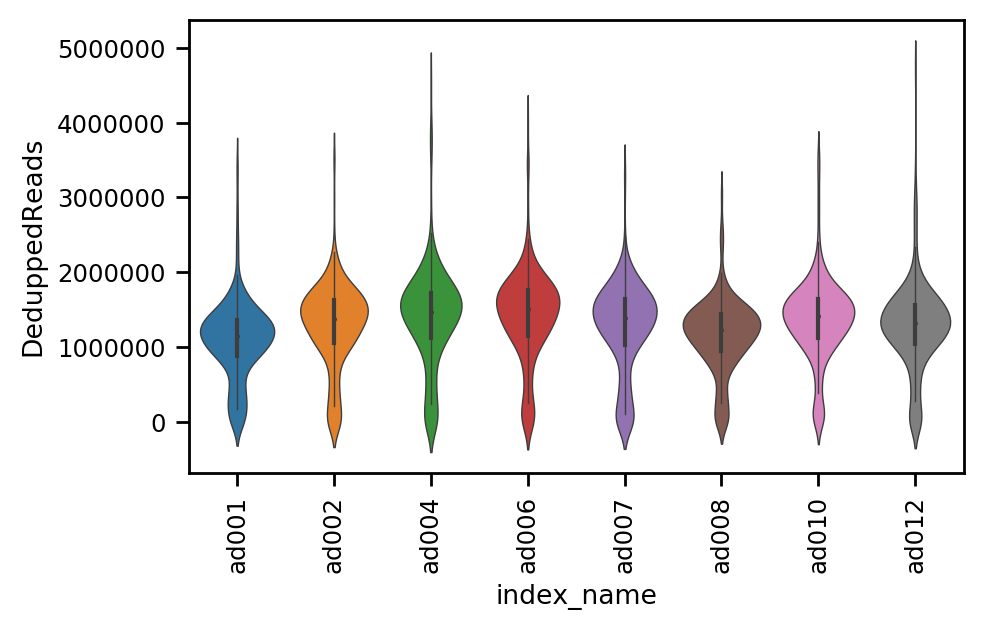

In [25]:
fig, ax = simple_violin(x='index_name', y='DeduppedReads', 
                        data=total_meta.reset_index())